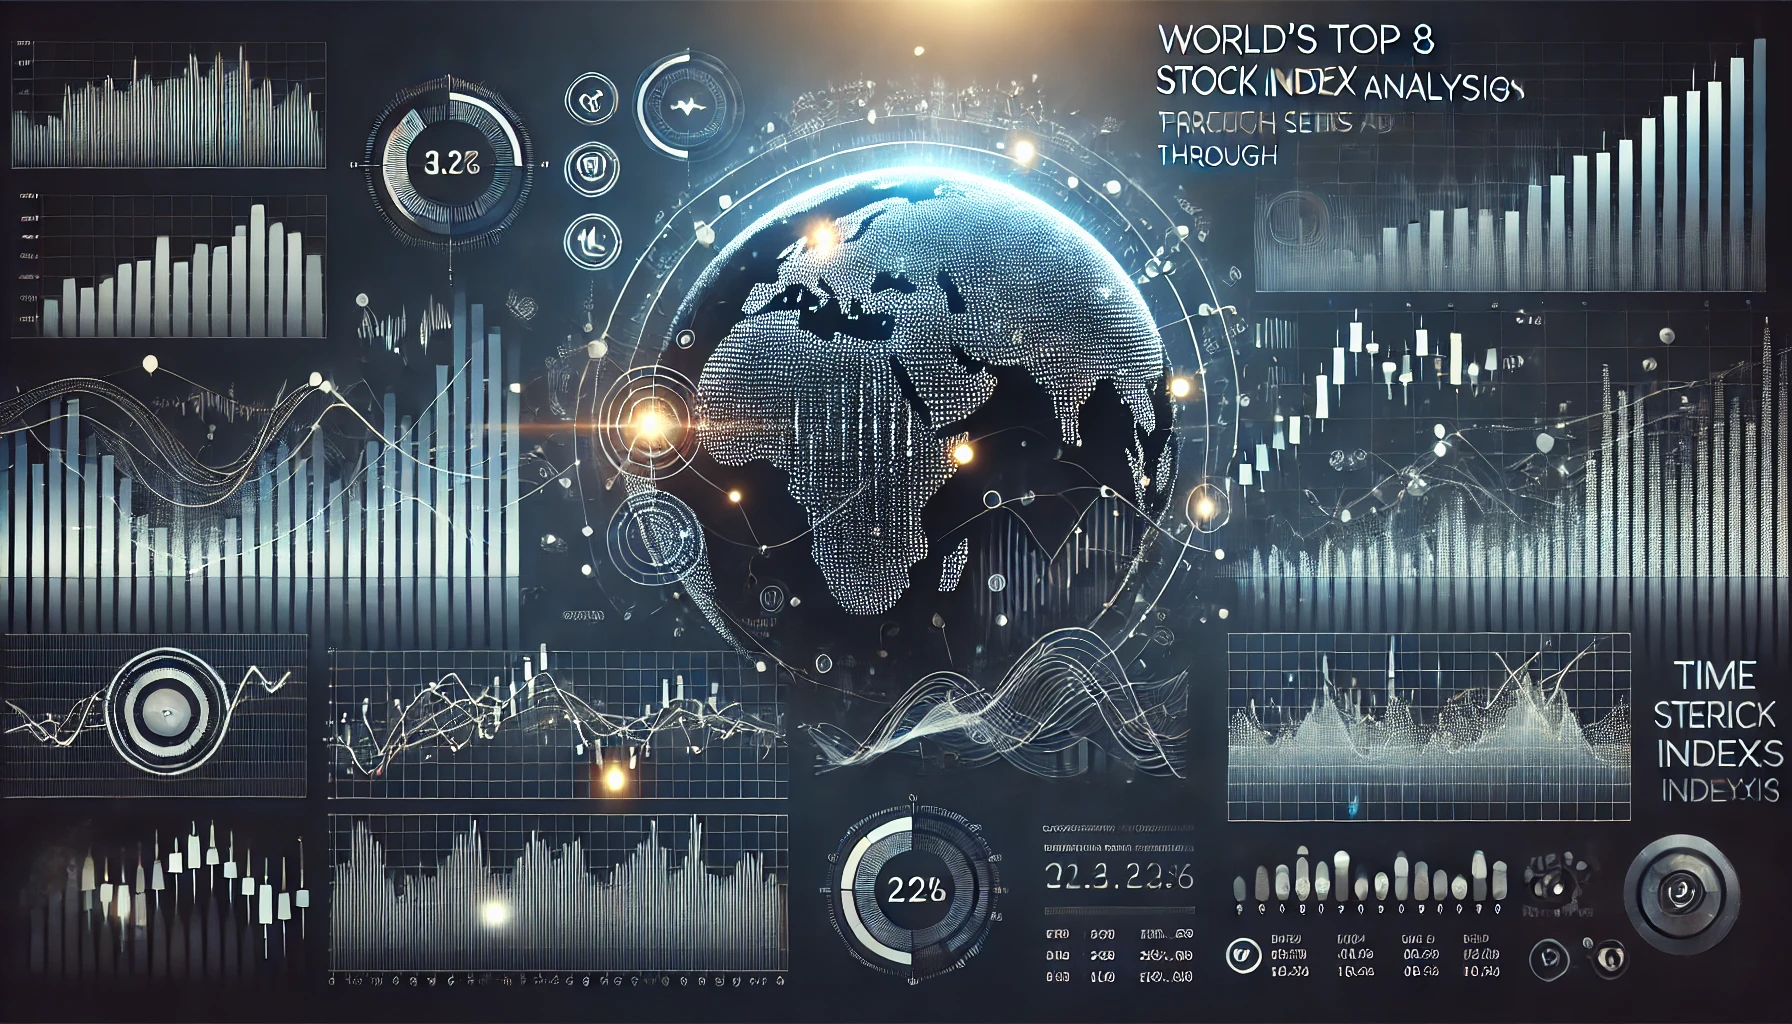

# Problem Statement

The stock market is characterized by volatility and fluctuations that are influenced by various macroeconomic factors, global events, and market sentiments. Predicting stock index movements can help investors, financial institutions, and traders make informed decisions to maximize returns and minimize risks. This project aims to predict the movements of the world's top 8 stock indices using time series analysis, enabling stakeholders to anticipate market trends and make data-driven investment decisions.

# Business Objectives

1. **Develop an Accurate Predictive Model**: Build and train a time series model capable of accurately predicting future movements of the top 8 global stock indices.
2. **Provide Actionable Insights**: Generate insights on key trends, patterns, and potential anomalies across different stock indices to help investors make informed decisions.
3. **Risk Management**: Help investors and financial institutions identify potential risks by predicting downturns or high volatility periods in the stock markets.
4. **Enhance Portfolio Strategies**: Support the development of dynamic portfolio management strategies by providing reliable stock index predictions that adjust to market conditions.

# Business Impacts

1. **Increased Investment Returns**: Accurate stock index predictions enable investors to better time their entry and exit points, leading to increased returns on investment.
2. **Reduced Financial Risks**: By anticipating market downturns or periods of high volatility, investors and financial institutions can implement risk mitigation strategies, reducing potential losses.
3. **Improved Decision-Making**: Reliable predictive models provide key insights into future trends, enhancing the decision-making processes for fund managers, retail investors, and institutional investors.
4. **Global Market Influence**: By analyzing and predicting the world's top stock indices, businesses and investors can better understand global market trends, aligning their strategies with larger economic movements.

# Importing Necessary Libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Importing the Data

In [2]:
tickers = ['^NYA', '^IXIC', '^N100', '000001.SS', '1592.T', '399001.SZ', '^NSEI', '^BSESN']

## Details of the Indices


1. **`^NYA`**: NYSE Composite (New York Stock Exchange)
2. **`IXIC`**: Nasdaq Composite (Nasdaq Stock Exhange)
3. **`^N100`**: Euronext 100
4. **`000001.SS`**: SSE Index (Shanghai Stock Exchange)
5. **`1592.T`**: JPX Nikkei 400 (Tokyo Stock Exhange)
6. **`399001.SZ`**: Shenzhen Index (Shenzhen Stock Exhange)
7. **`^NSEI`**: NIFTY50 (National Stock Exchange)
8. **`^BSESN`**: SENSEX (Bombay Stock Exchange)

In [3]:
data = yf.download(tickers, start='2021-01-01', end='2023-12-31')

[*********************100%***********************]  8 of 8 completed


In [4]:
data.head()

Price                        Adj Close                             \
Ticker                       000001.SS       1592.T     399001.SZ   
Date                                                                
2021-01-01 00:00:00+00:00          NaN          NaN           NaN   
2021-01-04 00:00:00+00:00  3502.958008  1356.211182  14827.469727   
2021-01-05 00:00:00+00:00  3528.677002  1356.211182  15147.570312   
2021-01-06 00:00:00+00:00  3550.876953  1358.019409  15187.610352   
2021-01-07 00:00:00+00:00  3576.205078  1369.773315  15356.400391   

Price                                                               \
Ticker                           ^BSESN         ^IXIC        ^N100   
Date                                                                 
2021-01-01 00:00:00+00:00  47868.980469           NaN          NaN   
2021-01-04 00:00:00+00:00  48176.800781  12698.450195  1112.520020   
2021-01-05 00:00:00+00:00  48437.781250  12818.959961  1109.560059   
2021-01-06 00:00:00+00:00  48174.058594  12740.790039  1120.229980   
2021-01-07 00:00:00+00:00  48093.320312  13067.480469  1122.130005   

Price                                                        Close          \
Ticker                            ^NSEI          ^NYA    000001.SS  1592.T   
Date                                                                         
2021-01-01 00:00:00+00:00  14018.500000           NaN          NaN     NaN   
2021-01-04 00:00:00+00:00  14132.900391  14376.700195  3502.958008  1500.0   
2021-01-05 00:00:00+00:00  14199.500000  14536.530273  3528.677002  1500.0   
2021-01-06 00:00:00+00:00  14146.250000  14788.839844  3550.876953  1502.0   
2021-01-07 00:00:00+00:00  14137.349609  14928.750000  3576.205078  1515.0   

Price                      ...          Open                  Volume           \
Ticker                     ...         ^NSEI          ^NYA 000001.SS   1592.T   
Date                       ...                                                  
2021-01-01 00:00:00+00:00  ...  13996.099609           NaN       NaN      NaN   
2021-01-04 00:00:00+00:00  ...  14104.349609  14601.450195  380800.0  23033.0   
2021-01-05 00:00:00+00:00  ...  14075.150391  14378.700195  408000.0  12218.0   
2021-01-06 00:00:00+00:00  ...  14240.950195  14594.480469  370200.0   8480.0   
2021-01-07 00:00:00+00:00  ...  14253.750000  14866.919922  405300.0   4421.0   

Price                                                                     \
Ticker                     399001.SZ   ^BSESN         ^IXIC        ^N100   
Date                                                                       
2021-01-01 00:00:00+00:00        NaN  82700.0           NaN          NaN   
2021-01-04 00:00:00+00:00  2007300.0  13900.0  6.636170e+09  212061800.0   
2021-01-05 00:00:00+00:00  2173300.0  12200.0  6.971860e+09  218986100.0   
2021-01-06 00:00:00+00:00  1891600.0  22500.0  7.689880e+09  301605700.0   
2021-01-07 00:00:00+00:00  2066500.0  18400.0  6.841480e+09  238762200.0   

Price                                              
Ticker                        ^NSEI          ^NYA  
Date                                               
2021-01-01 00:00:00+00:00  358100.0           NaN  
2021-01-04 00:00:00+00:00  495000.0  5.015000e+09  
2021-01-05 00:00:00+00:00  492500.0  4.591020e+09  
2021-01-06 00:00:00+00:00  632300.0  6.064110e+09  
2021-01-07 00:00:00+00:00  559200.0  5.099160e+09  

[5 rows x 48 columns]

In [5]:
data.columns

MultiIndex([('Adj Close', '000001.SS'),
            ('Adj Close',    '1592.T'),
            ('Adj Close', '399001.SZ'),
            ('Adj Close',    '^BSESN'),
            ('Adj Close',     '^IXIC'),
            ('Adj Close',     '^N100'),
            ('Adj Close',     '^NSEI'),
            ('Adj Close',      '^NYA'),
            (    'Close', '000001.SS'),
            (    'Close',    '1592.T'),
            (    'Close', '399001.SZ'),
            (    'Close',    '^BSESN'),
            (    'Close',     '^IXIC'),
            (    'Close',     '^N100'),
            (    'Close',     '^NSEI'),
            (    'Close',      '^NYA'),
            (     'High', '000001.SS'),
            (     'High',    '1592.T'),
            (     'High', '399001.SZ'),
            (     'High',    '^BSESN'),
            (     'High',     '^IXIC'),
            (     'High',     '^N100'),
            (     'High',     '^NSEI'),
            (     'High',      '^NYA'),
            (      'Low', '000001.SS'),


## Renaming the Columns

In [6]:
new_column_names = {
    'Price': 'Price',
    'Ticker': 'Ticker',
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Close': 'Close',
    'Adj Close': 'Adj Close',
    'Volume': 'Volume',
    '^NYA': 'NYSE Composite',
    '^IXIC': 'Nasdaq Composite',
    '^N100': 'Euronext 100',
    '000001.SS': 'SSE Index',
    '1592.T': 'JPX Nikkei 400 ',
    '399001.SZ': 'Shenzhen Index',
    '^NSEI': 'NIFTY50',
    '^BSESN': 'SENSEX'
}

In [7]:
data = data.rename(columns=new_column_names)

In [8]:
data.head()

Price                        Adj Close                                 \
Ticker                       SSE Index JPX Nikkei 400  Shenzhen Index   
Date                                                                    
2021-01-01 00:00:00+00:00          NaN             NaN            NaN   
2021-01-04 00:00:00+00:00  3502.958008     1356.211182   14827.469727   
2021-01-05 00:00:00+00:00  3528.677002     1356.211182   15147.570312   
2021-01-06 00:00:00+00:00  3550.876953     1358.019409   15187.610352   
2021-01-07 00:00:00+00:00  3576.205078     1369.773315   15356.400391   

Price                                                                  \
Ticker                           SENSEX Nasdaq Composite Euronext 100   
Date                                                                    
2021-01-01 00:00:00+00:00  47868.980469              NaN          NaN   
2021-01-04 00:00:00+00:00  48176.800781     12698.450195  1112.520020   
2021-01-05 00:00:00+00:00  48437.781250     12818.959961  1109.560059   
2021-01-06 00:00:00+00:00  48174.058594     12740.790039  1120.229980   
2021-01-07 00:00:00+00:00  48093.320312     13067.480469  1122.130005   

Price                                                         Close  \
Ticker                          NIFTY50 NYSE Composite    SSE Index   
Date                                                                  
2021-01-01 00:00:00+00:00  14018.500000            NaN          NaN   
2021-01-04 00:00:00+00:00  14132.900391   14376.700195  3502.958008   
2021-01-05 00:00:00+00:00  14199.500000   14536.530273  3528.677002   
2021-01-06 00:00:00+00:00  14146.250000   14788.839844  3550.876953   
2021-01-07 00:00:00+00:00  14137.349609   14928.750000  3576.205078   

Price                                      ...          Open                 \
Ticker                    JPX Nikkei 400   ...       NIFTY50 NYSE Composite   
Date                                       ...                                
2021-01-01 00:00:00+00:00             NaN  ...  13996.099609            NaN   
2021-01-04 00:00:00+00:00          1500.0  ...  14104.349609   14601.450195   
2021-01-05 00:00:00+00:00          1500.0  ...  14075.150391   14378.700195   
2021-01-06 00:00:00+00:00          1502.0  ...  14240.950195   14594.480469   
2021-01-07 00:00:00+00:00          1515.0  ...  14253.750000   14866.919922   

Price                        Volume                                          \
Ticker                    SSE Index JPX Nikkei 400  Shenzhen Index   SENSEX   
Date                                                                          
2021-01-01 00:00:00+00:00       NaN             NaN            NaN  82700.0   
2021-01-04 00:00:00+00:00  380800.0         23033.0      2007300.0  13900.0   
2021-01-05 00:00:00+00:00  408000.0         12218.0      2173300.0  12200.0   
2021-01-06 00:00:00+00:00  370200.0          8480.0      1891600.0  22500.0   
2021-01-07 00:00:00+00:00  405300.0          4421.0      2066500.0  18400.0   

Price                                                              \
Ticker                    Nasdaq Composite Euronext 100   NIFTY50   
Date                                                                
2021-01-01 00:00:00+00:00              NaN          NaN  358100.0   
2021-01-04 00:00:00+00:00     6.636170e+09  212061800.0  495000.0   
2021-01-05 00:00:00+00:00     6.971860e+09  218986100.0  492500.0   
2021-01-06 00:00:00+00:00     7.689880e+09  301605700.0  632300.0   
2021-01-07 00:00:00+00:00     6.841480e+09  238762200.0  559200.0   

Price                                     
Ticker                    NYSE Composite  
Date                                      
2021-01-01 00:00:00+00:00            NaN  
2021-01-04 00:00:00+00:00   5.015000e+09  
2021-01-05 00:00:00+00:00   4.591020e+09  
2021-01-06 00:00:00+00:00   6.064110e+09  
2021-01-07 00:00:00+00:00   5.099160e+09  

[5 rows x 48 columns]

In [9]:
data.columns

MultiIndex([('Adj Close',        'SSE Index'),
            ('Adj Close',  'JPX Nikkei 400 '),
            ('Adj Close',   'Shenzhen Index'),
            ('Adj Close',           'SENSEX'),
            ('Adj Close', 'Nasdaq Composite'),
            ('Adj Close',     'Euronext 100'),
            ('Adj Close',          'NIFTY50'),
            ('Adj Close',   'NYSE Composite'),
            (    'Close',        'SSE Index'),
            (    'Close',  'JPX Nikkei 400 '),
            (    'Close',   'Shenzhen Index'),
            (    'Close',           'SENSEX'),
            (    'Close', 'Nasdaq Composite'),
            (    'Close',     'Euronext 100'),
            (    'Close',          'NIFTY50'),
            (    'Close',   'NYSE Composite'),
            (     'High',        'SSE Index'),
            (     'High',  'JPX Nikkei 400 '),
            (     'High',   'Shenzhen Index'),
            (     'High',           'SENSEX'),
            (     'High', 'Nasdaq Composite'),
            (

In [10]:
data.to_csv('top_8_index.csv')

In [11]:
data = pd.read_csv('top_8_index.csv', header=[0,1], index_col=0, parse_dates=True)

In [12]:
data.head()

Price                        Adj Close                                 \
Ticker                       SSE Index JPX Nikkei 400  Shenzhen Index   
Date                                                                    
2021-01-01 00:00:00+00:00          NaN             NaN            NaN   
2021-01-04 00:00:00+00:00  3502.958008     1356.211182   14827.469727   
2021-01-05 00:00:00+00:00  3528.677002     1356.211182   15147.570312   
2021-01-06 00:00:00+00:00  3550.876953     1358.019409   15187.610352   
2021-01-07 00:00:00+00:00  3576.205078     1369.773315   15356.400391   

Price                                                                  \
Ticker                           SENSEX Nasdaq Composite Euronext 100   
Date                                                                    
2021-01-01 00:00:00+00:00  47868.980469              NaN          NaN   
2021-01-04 00:00:00+00:00  48176.800781     12698.450195  1112.520020   
2021-01-05 00:00:00+00:00  48437.781250     12818.959961  1109.560059   
2021-01-06 00:00:00+00:00  48174.058594     12740.790039  1120.229980   
2021-01-07 00:00:00+00:00  48093.320312     13067.480469  1122.130005   

Price                                                         Close  \
Ticker                          NIFTY50 NYSE Composite    SSE Index   
Date                                                                  
2021-01-01 00:00:00+00:00  14018.500000            NaN          NaN   
2021-01-04 00:00:00+00:00  14132.900391   14376.700195  3502.958008   
2021-01-05 00:00:00+00:00  14199.500000   14536.530273  3528.677002   
2021-01-06 00:00:00+00:00  14146.250000   14788.839844  3550.876953   
2021-01-07 00:00:00+00:00  14137.349609   14928.750000  3576.205078   

Price                                      ...          Open                 \
Ticker                    JPX Nikkei 400   ...       NIFTY50 NYSE Composite   
Date                                       ...                                
2021-01-01 00:00:00+00:00             NaN  ...  13996.099609            NaN   
2021-01-04 00:00:00+00:00          1500.0  ...  14104.349609   14601.450195   
2021-01-05 00:00:00+00:00          1500.0  ...  14075.150391   14378.700195   
2021-01-06 00:00:00+00:00          1502.0  ...  14240.950195   14594.480469   
2021-01-07 00:00:00+00:00          1515.0  ...  14253.750000   14866.919922   

Price                        Volume                                          \
Ticker                    SSE Index JPX Nikkei 400  Shenzhen Index   SENSEX   
Date                                                                          
2021-01-01 00:00:00+00:00       NaN             NaN            NaN  82700.0   
2021-01-04 00:00:00+00:00  380800.0         23033.0      2007300.0  13900.0   
2021-01-05 00:00:00+00:00  408000.0         12218.0      2173300.0  12200.0   
2021-01-06 00:00:00+00:00  370200.0          8480.0      1891600.0  22500.0   
2021-01-07 00:00:00+00:00  405300.0          4421.0      2066500.0  18400.0   

Price                                                              \
Ticker                    Nasdaq Composite Euronext 100   NIFTY50   
Date                                                                
2021-01-01 00:00:00+00:00              NaN          NaN  358100.0   
2021-01-04 00:00:00+00:00     6.636170e+09  212061800.0  495000.0   
2021-01-05 00:00:00+00:00     6.971860e+09  218986100.0  492500.0   
2021-01-06 00:00:00+00:00     7.689880e+09  301605700.0  632300.0   
2021-01-07 00:00:00+00:00     6.841480e+09  238762200.0  559200.0   

Price                                     
Ticker                    NYSE Composite  
Date                                      
2021-01-01 00:00:00+00:00            NaN  
2021-01-04 00:00:00+00:00   5.015000e+09  
2021-01-05 00:00:00+00:00   4.591020e+09  
2021-01-06 00:00:00+00:00   6.064110e+09  
2021-01-07 00:00:00+00:00   5.099160e+09  

[5 rows x 48 columns]

The CSV file contains data related to the world's top 8 stock indices. Here is a breakdown of its structure:

1. **First Row (Header)**: It provides the labels for each stock index and their respective columns. For example:
   - `Price`
   - `Adj Close`, `Adj Close.1`, ..., `Adj Close.7` (representing adjusted closing prices for different indices such as SSE Index, SENSEX, Nasdaq Composite, etc.)

2. **Second Row**: Lists the ticker symbols for different stock indices. For example:
   - `SSE Index` (Shanghai Composite Index)
   - `SENSEX` (S&P BSE Sensex)
   - `Nasdaq Composite` (NASDAQ Composite)
   - `NIFTY50` (Nifty 50)
   - `NYSE Composite` (NYSE Composite)

3. **Third Row and Beyond**: Contains date and stock market data. For example:
   - Dates are in the format `YYYY-MM-DD`.
   - Values include adjusted close prices, opening prices, and volumes for each stock index.

4. **Some More Details**:

  - **Shape**: The dataset has 783 rows and 49 columns.
  - **Columns**: The dataset includes columns representing adjusted closing prices, opening prices, high/low prices, and trading volumes for different stock indices, named sequentially (e.g., `Adj Close`, `Adj Close.1`, `Close`, `High`, `Low`, `Volume`, etc.).
  
  - **Data Types**: All columns are currently stored as object (string) types, which may need conversion to numeric values for proper analysis.
  
  - **Missing Values**: There are missing values across several columns. For example:
    - `Adj Close`: 55 missing values
    - `Volume`: 55 missing values
    - Other columns such as `Open`, `Close`, and `High` also have missing data, ranging between 29 and 55 missing values.

  - **Descriptive Statistics**:
    - The descriptive statistics give information about the count of non-null values, unique values, and frequency of certain repeated values.
    - For example, `High.6` (one of the columns) has 742 non-null values, and the most frequent value is `18286.94921875`, which appears twice.

This dataset represents financial time series data for different global stock indices, but cleaning and type conversions will be necessary before deeper analysis or modeling can be performed.

This dataset also provides key financial metrics, including adjusted closing prices, opening prices, and trading volumes for various global stock indices on different dates, allowing for analysis and time series forecasting of stock market trends.

In [13]:
data.shape

(781, 48)

# Treating the Null Values

In [14]:
data.isnull().sum().sort_values(ascending=False)

Price      Ticker          
Adj Close  SSE Index           54
Close      Shenzhen Index      54
Volume     Shenzhen Index      54
           SSE Index           54
Open       Shenzhen Index      54
           SSE Index           54
Low        Shenzhen Index      54
High       Shenzhen Index      54
           SSE Index           54
Low        SSE Index           54
Adj Close  Shenzhen Index      54
Close      SSE Index           54
           JPX Nikkei 400      46
High       JPX Nikkei 400      46
Low        JPX Nikkei 400      46
Adj Close  JPX Nikkei 400      46
Volume     JPX Nikkei 400      46
Open       JPX Nikkei 400      46
Volume     SENSEX              41
High       SENSEX              41
Adj Close  SENSEX              41
Low        SENSEX              41
Close      SENSEX              41
Open       SENSEX              41
Close      NIFTY50             40
Volume     NIFTY50             40
Adj Close  NIFTY50             40
Open       NIFTY50             40
Low        NIFTY50             40
High       NIFTY50             40
Adj Close  Nasdaq Composite    28
Open       NYSE Composite      28
Volume     Nasdaq Composite    28
Open       Nasdaq Composite    28
Volume     NYSE Composite      28
Low        NYSE Composite      28
           Nasdaq Composite    28
High       NYSE Composite      28
           Nasdaq Composite    28
Adj Close  NYSE Composite      28
Close      NYSE Composite      28
           Nasdaq Composite    28
Adj Close  Euronext 100        11
Open       Euronext 100        11
High       Euronext 100        11
Close      Euronext 100        11
Volume     Euronext 100        11
Low        Euronext 100        11
dtype: int64

In [15]:
data = data.ffill()
data.isnull().sum().sort_values(ascending=False)

Price      Ticker          
Adj Close  SSE Index           1
High       Euronext 100        1
Adj Close  JPX Nikkei 400      1
Low        JPX Nikkei 400      1
           Shenzhen Index      1
           Nasdaq Composite    1
           Euronext 100        1
           NYSE Composite      1
Open       SSE Index           1
           JPX Nikkei 400      1
           Shenzhen Index      1
           Nasdaq Composite    1
           Euronext 100        1
           NYSE Composite      1
Volume     SSE Index           1
           JPX Nikkei 400      1
           Shenzhen Index      1
           Nasdaq Composite    1
           Euronext 100        1
High       NYSE Composite      1
Low        SSE Index           1
High       Nasdaq Composite    1
Close      Euronext 100        1
Adj Close  Shenzhen Index      1
           Nasdaq Composite    1
           Euronext 100        1
           NYSE Composite      1
Close      SSE Index           1
           JPX Nikkei 400      1
           Nasdaq Composite    1
           Shenzhen Index      1
High       SSE Index           1
Close      NYSE Composite      1
High       Shenzhen Index      1
           JPX Nikkei 400      1
Volume     NYSE Composite      1
Open       SENSEX              0
Low        SENSEX              0
Open       NIFTY50             0
Close      NIFTY50             0
Adj Close  NIFTY50             0
High       NIFTY50             0
Close      SENSEX              0
Volume     SENSEX              0
Adj Close  SENSEX              0
High       SENSEX              0
Volume     NIFTY50             0
Low        NIFTY50             0
dtype: int64

In [16]:
data = data.bfill()
data.isnull().sum().sort_values(ascending=False)

Price      Ticker          
Adj Close  SSE Index           0
           JPX Nikkei 400      0
Low        Shenzhen Index      0
           SENSEX              0
           Nasdaq Composite    0
           Euronext 100        0
           NIFTY50             0
           NYSE Composite      0
Open       SSE Index           0
           JPX Nikkei 400      0
           Shenzhen Index      0
           SENSEX              0
           Nasdaq Composite    0
           Euronext 100        0
           NIFTY50             0
           NYSE Composite      0
Volume     SSE Index           0
           JPX Nikkei 400      0
           Shenzhen Index      0
           SENSEX              0
           Nasdaq Composite    0
           Euronext 100        0
           NIFTY50             0
Low        JPX Nikkei 400      0
           SSE Index           0
High       NYSE Composite      0
Close      SENSEX              0
Adj Close  Shenzhen Index      0
           SENSEX              0
           Nasdaq Composite    0
           Euronext 100        0
           NIFTY50             0
           NYSE Composite      0
Close      SSE Index           0
           JPX Nikkei 400      0
           Shenzhen Index      0
           Nasdaq Composite    0
High       NIFTY50             0
Close      Euronext 100        0
           NIFTY50             0
           NYSE Composite      0
High       SSE Index           0
           JPX Nikkei 400      0
           Shenzhen Index      0
           SENSEX              0
           Nasdaq Composite    0
           Euronext 100        0
Volume     NYSE Composite      0
dtype: int64

In [17]:
data.shape

(781, 48)

In [18]:
print(data.columns)

MultiIndex([('Adj Close',        'SSE Index'),
            ('Adj Close',  'JPX Nikkei 400 '),
            ('Adj Close',   'Shenzhen Index'),
            ('Adj Close',           'SENSEX'),
            ('Adj Close', 'Nasdaq Composite'),
            ('Adj Close',     'Euronext 100'),
            ('Adj Close',          'NIFTY50'),
            ('Adj Close',   'NYSE Composite'),
            (    'Close',        'SSE Index'),
            (    'Close',  'JPX Nikkei 400 '),
            (    'Close',   'Shenzhen Index'),
            (    'Close',           'SENSEX'),
            (    'Close', 'Nasdaq Composite'),
            (    'Close',     'Euronext 100'),
            (    'Close',          'NIFTY50'),
            (    'Close',   'NYSE Composite'),
            (     'High',        'SSE Index'),
            (     'High',  'JPX Nikkei 400 '),
            (     'High',   'Shenzhen Index'),
            (     'High',           'SENSEX'),
            (     'High', 'Nasdaq Composite'),
            (

# Basic EDAs

## Top 8 Stock Indices of the World (2021-2023)

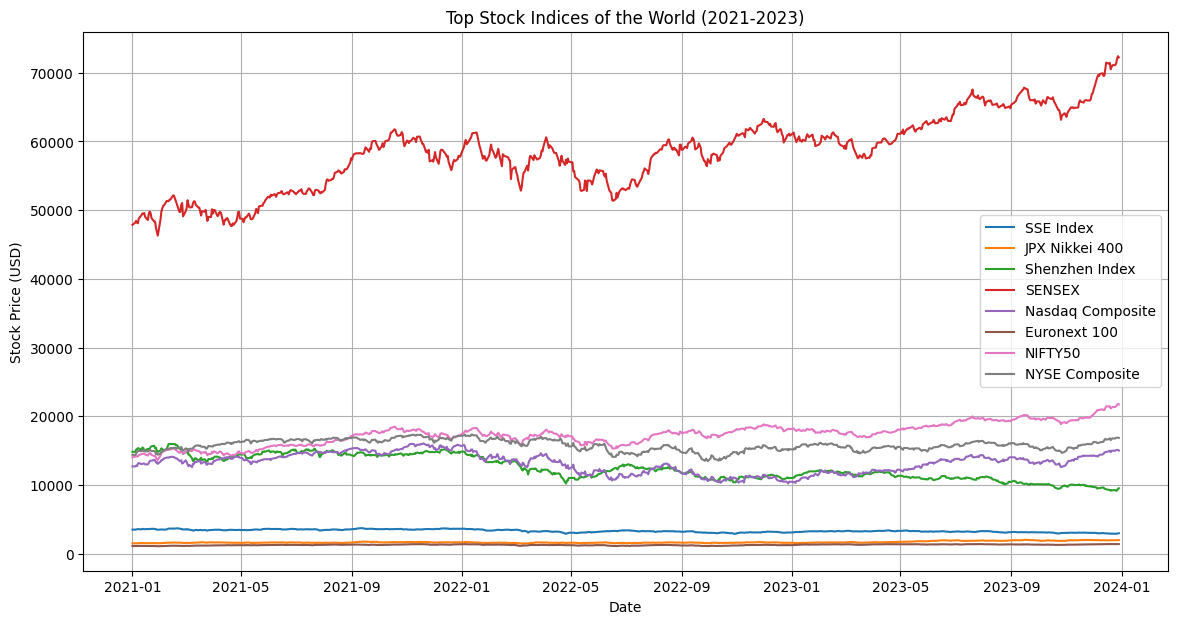

In [19]:
plt.figure(figsize=(14, 7))
valid_ticker = [col[1] for col in data.columns if col[0] == 'Close']
for ticker in valid_ticker:
    plt.plot(data.index, data[('Close', ticker)], label=ticker)

plt.title('Top Stock Indices of the World (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

This plot represents the **historical performance of the top 8 stock indices of the world** from 2021 to 2023. Here's a breakdown of what the plot shows:

***Key Elements***:
1. **Title**: The title of the plot, "Top 8 Stock Indices of the World (2021 to 23-08-2024)," indicates that this is a time series plot showing the stock prices for eight different indices over the specified time period.

2. **X-Axis (Date)**: The x-axis represents the date, spanning from early 2021 to August 2024. This axis helps to track how the stock indices have performed over time.

3. **Y-Axis (Stock Price in USD)**: The y-axis represents the stock prices in USD. It shows how the stock prices for each index have fluctuated over time.

4. **Different Colored Lines**: Each colored line represents one of the eight stock indices. The legend on the right specifies which color corresponds to which stock index:
   - **Blue Line (NYSE Composite, ^NYA)**: This line shows the performance of the NYSE Composite index.
   - **Orange Line (Nasdaq Composite, ^IXIC)**: This line represents the Nasdaq Composite index.
   - **Green Line (Euronext 100, ^N100)**: This line shows the performance of the Euronext 100.
   - **Red Line (SSE Index, 000001.SS)**: This line represents the Shanghai Stock Exchange Index (SSE Index).
   - **Purple Line (JPX Nikkei 400, 1592.T)**: This line represents the JPX Nikkei 400.
   - **Brown Line (Shenzhen Index, 399001.SZ)**: This line represents the Shenzhen Index.
   - **Pink Line (NIFTY50, ^NSEI)**: This line represents the NIFTY50 index.
   - **Black Line (SENSEX, ^BSESN)**: This line represents the SENSEX (Bombay Stock Exchange) index.

***Observations***:
1. **Performance of the SENSEX (^BSESN)**:
   - The black line, representing the SENSEX, shows a significant rise over time, starting from around 45,000 in 2021 to over 70,000 by August 2024. This indicates that the SENSEX has been performing very well over the given period and has experienced steady growth.

2. **Other Indices**:
   - Other indices, such as the Nasdaq Composite (^IXIC), NYSE Composite (^NYA), and NIFTY50 (^NSEI), show relatively flatter growth compared to the SENSEX, with their stock prices remaining between 10,000 to 20,000 USD.
   - The SSE Index (000001.SS) and Shenzhen Index (399001.SZ) appear to have fluctuated with some slight declines over time, indicating potential weakness in these Chinese indices.

3. **General Trends**:
   - The plot shows that most of the indices have fluctuated over time with varying degrees of volatility. However, the SENSEX stands out as the best performer with significant growth.
   - Other indices like the Nasdaq Composite and NYSE Composite have shown more moderate but consistent growth over the period.


This plot provides a visual comparison of the stock price trends for eight of the world's major stock indices over a period of more than three years. The SENSEX has shown remarkable growth compared to other indices, while indices like the Nasdaq Composite and NYSE Composite have displayed more moderate growth. The Chinese indices, on the other hand, have shown either flat or slightly declining trends during this period.

## Volatility of the Indices

In [20]:
daily_returns = data['Close'].pct_change()

volatility = daily_returns.std()*np.sqrt(252)
print(volatility)

Ticker
SSE Index           0.141863
JPX Nikkei 400      0.150955
Shenzhen Index      0.189565
SENSEX              0.144025
Nasdaq Composite    0.230570
Euronext 100        0.160330
NIFTY50             0.142588
NYSE Composite      0.155822
dtype: float64


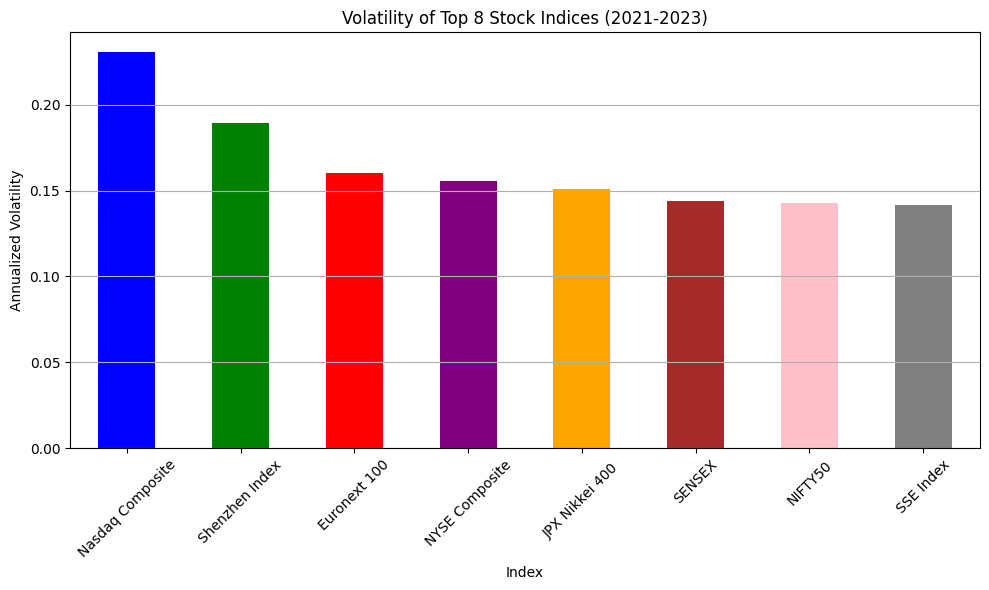

In [21]:
volatility_sorted = volatility.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']
volatility_sorted.plot(kind='bar', color=colors)
plt.title('Volatility of Top 8 Stock Indices (2021-2023)')
plt.xlabel('Index')
plt.ylabel('Annualized Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

This plot is a **bar chart** representing the **annualized volatility** of the top 8 stock indices for the period between **2021 and 2023**. Volatility is a statistical measure of the dispersion of returns for a given security or market index. In this case, the y-axis indicates the **annualized volatility** of each stock index, while the x-axis lists the various stock indices.

***Key Elements***:

1. **Title**:
   - The title of the chart is **"Volatility of Top 8 Stock Indices (2021-2023)"**, indicating that the chart shows how volatile each of these indices has been over this period.

2. **X-Axis (Index)**:
   - The x-axis represents the different stock indices, denoted by their ticker symbols. These include:
     - **^IXIC**: Nasdaq Composite (Blue Bar)
     - **399001.SZ**: Shenzhen Index (Green Bar)
     - **^N100**: Euronext 100 (Red Bar)
     - **^NYA**: NYSE Composite (Purple Bar)
     - **1592.T**: JPX Nikkei 400 (Orange Bar)
     - **^BSESN**: SENSEX (Brown Bar)
     - **^NSEI**: NIFTY50 (Pink Bar)
     - **000001.SS**: SSE Index (Shanghai) (Gray Bar)

3. **Y-Axis (Annualized Volatility)**:
   - The y-axis represents the **annualized volatility** of the indices, with values ranging from 0.00 to approximately 0.22 (or 22%).

4. **Bar Heights**:
   - The height of each bar represents the annualized volatility for each index. The taller the bar, the more volatile that particular index has been during the 2021-2023 period.

***Observations***:

1. **Highest Volatility**:
   - **^IXIC (Nasdaq Composite)** has the highest volatility, with a value slightly above **0.20 (20%)**. This indicates that the Nasdaq Composite index has experienced the most price fluctuation relative to the other indices over the observed period. Higher volatility typically indicates more risk, but also potentially higher returns.

2. **Moderate Volatility**:
   - **399001.SZ (Shenzhen Index)** and **1592.T (JPX Nikkei 400)** show moderate volatility, around **0.16 to 0.18 (16%-18%)**. These indices have had noticeable price swings, but less than the Nasdaq Composite.
   - **^N100 (Euronext 100)** and **^NYA (NYSE Composite)** also have moderate volatility, falling into a similar range of **0.15 to 0.16 (15%-16%)**.

3. **Lowest Volatility**:
   - **000001.SS (SSE Index)**, **^BSESN (SENSEX)**, and **^NSEI (NIFTY50)** have lower volatility, with values close to **0.12 (12%)**. This indicates that these indices have had relatively stable price movements compared to the more volatile indices like the Nasdaq Composite.

***Interpretation***:

- **High Volatility**: Indices like the **Nasdaq Composite** have shown more pronounced swings in prices, reflecting either larger fluctuations in investor sentiment or changes in market conditions that cause more price movement. This could be due to the nature of the tech-heavy Nasdaq index, which is often more sensitive to market conditions.
  
- **Low Volatility**: Indices like the **SSE Index**, **SENSEX**, and **NIFTY50** have been more stable, with less dramatic price changes over the same period, suggesting a more steady market environment in those regions.


This bar chart provides an overview of how volatile the top 8 stock indices have been between 2021 and 2023. The Nasdaq Composite has been the most volatile, while the SENSEX, NIFTY50, and SSE Index have been the least volatile. This information can be used by investors to assess the risk associated with each index and potentially align their investment strategies accordingly.

## Distribution of Closing Indices

In [22]:
closing_prices = data['Close']
closing_prices = closing_prices.ffill()
closing_prices.head()

Ticker                       SSE Index  JPX Nikkei 400   Shenzhen Index  \
Date                                                                      
2021-01-01 00:00:00+00:00  3502.958008           1500.0    14827.469727   
2021-01-04 00:00:00+00:00  3502.958008           1500.0    14827.469727   
2021-01-05 00:00:00+00:00  3528.677002           1500.0    15147.570312   
2021-01-06 00:00:00+00:00  3550.876953           1502.0    15187.610352   
2021-01-07 00:00:00+00:00  3576.205078           1515.0    15356.400391   

Ticker                           SENSEX  Nasdaq Composite  Euronext 100  \
Date                                                                      
2021-01-01 00:00:00+00:00  47868.980469      12698.450195   1112.520020   
2021-01-04 00:00:00+00:00  48176.800781      12698.450195   1112.520020   
2021-01-05 00:00:00+00:00  48437.781250      12818.959961   1109.560059   
2021-01-06 00:00:00+00:00  48174.058594      12740.790039   1120.229980   
2021-01-07 00:00:00+00:00  48093.320312      13067.480469   1122.130005   

Ticker                          NIFTY50  NYSE Composite  
Date                                                     
2021-01-01 00:00:00+00:00  14018.500000    14376.700195  
2021-01-04 00:00:00+00:00  14132.900391    14376.700195  
2021-01-05 00:00:00+00:00  14199.500000    14536.530273  
2021-01-06 00:00:00+00:00  14146.250000    14788.839844  
2021-01-07 00:00:00+00:00  14137.349609    14928.750000

In [23]:
closing_prices.isnull().sum()

Ticker
SSE Index           0
JPX Nikkei 400      0
Shenzhen Index      0
SENSEX              0
Nasdaq Composite    0
Euronext 100        0
NIFTY50             0
NYSE Composite      0
dtype: int64

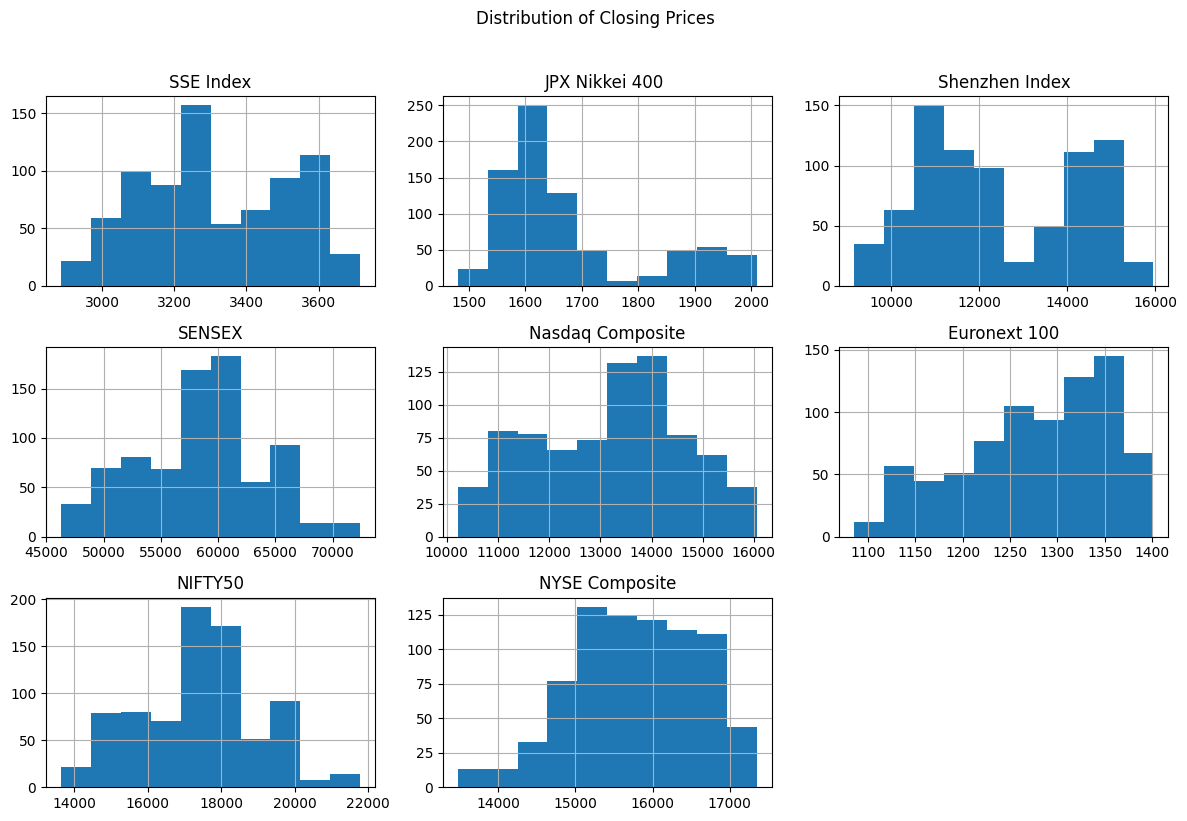

In [24]:
closing_prices.hist(figsize=(12, 8))
plt.suptitle('Distribution of Closing Prices', y=1.02)
plt.tight_layout()
plt.show()

This image contains multiple histograms that visualize the **distribution of closing prices** for various stock indices. Each subplot corresponds to a different stock index and illustrates how often certain price ranges occurred within the dataset.

***Key Aspects***:

1. **Histograms for Different Indices**:
   - Each histogram is labeled with the corresponding stock index:
     - **SSE Index** (Shanghai Stock Exchange)
     - **JPX Nikkei 400** (Japan Exchange Group)
     - **Shenzhen Index**
     - **SENSEX** (India)
     - **Nasdaq Composite** (USA)
     - **Euronext 100** (Europe)
     - **NIFTY50** (India)
     - **NYSE Composite** (USA)

2. **X-Axis (Price Ranges)**:
   - The x-axis of each histogram represents the **price ranges** for each index. These ranges are divided into bins, with each bin corresponding to a range of values within which the closing prices fall.

3. **Y-Axis (Frequency)**:
   - The y-axis represents the **frequency** or the number of days on which the closing prices fell within the corresponding price range. Higher bars indicate that the closing price frequently fell within that particular range.

***Interpretation of the Histograms***:

1. **SSE Index**:
   - The SSE Index shows a relatively **bimodal distribution**, with two peaks: one around 3200 and another around 3500, indicating that closing prices were most frequent around these two ranges.

2. **JPX Nikkei 400**:
   - The JPX Nikkei 400 index has a **skewed distribution** with most of the closing prices clustered around the 1600 range. There are fewer occurrences of closing prices above 1800.

3. **Shenzhen Index**:
   - This index has a broader distribution, with closing prices frequently falling between 10,000 and 15,000. It exhibits a **multi-modal distribution**, with peaks at different levels.

4. **SENSEX**:
   - The distribution for the SENSEX shows a clear **peak around 60,000**, meaning that the closing prices were most frequently observed in this range. The distribution also has a right skew with fewer occurrences at higher values.

5. **Nasdaq Composite**:
   - The Nasdaq Composite shows a somewhat **bell-shaped distribution** with a peak around 14,000, indicating that this price range was the most common for the closing prices.

6. **Euronext 100**:
   - This histogram shows an **increasing trend** with more frequent occurrences at higher price levels, particularly in the range of 1300 to 1400.

7. **NIFTY50**:
   - The NIFTY50 distribution has a peak around 18,000, meaning that closing prices were most common at this level. The histogram shows fewer occurrences of prices above 20,000 or below 15,000.

8. **NYSE Composite**:
   - The NYSE Composite distribution is **skewed to the right**, with the majority of closing prices falling in the range of 15,000 to 16,000. There are fewer occurrences at the higher end of the spectrum (above 17,000).

***Summary***:
- Each histogram provides insight into the **distribution of closing prices** for each stock index. Indices such as **SENSEX**, **Nasdaq Composite**, and **NIFTY50** exhibit more **normal-like distributions**, while others like the **SSE Index** and **Shenzhen Index** display more **multi-modal or skewed distributions**.
- These distributions give a quick snapshot of how stock prices fluctuated and which ranges were most common, offering valuable insights for investors analyzing the historical behavior of these indices.

## Closing Values with Rolling Means and Standard Deviations

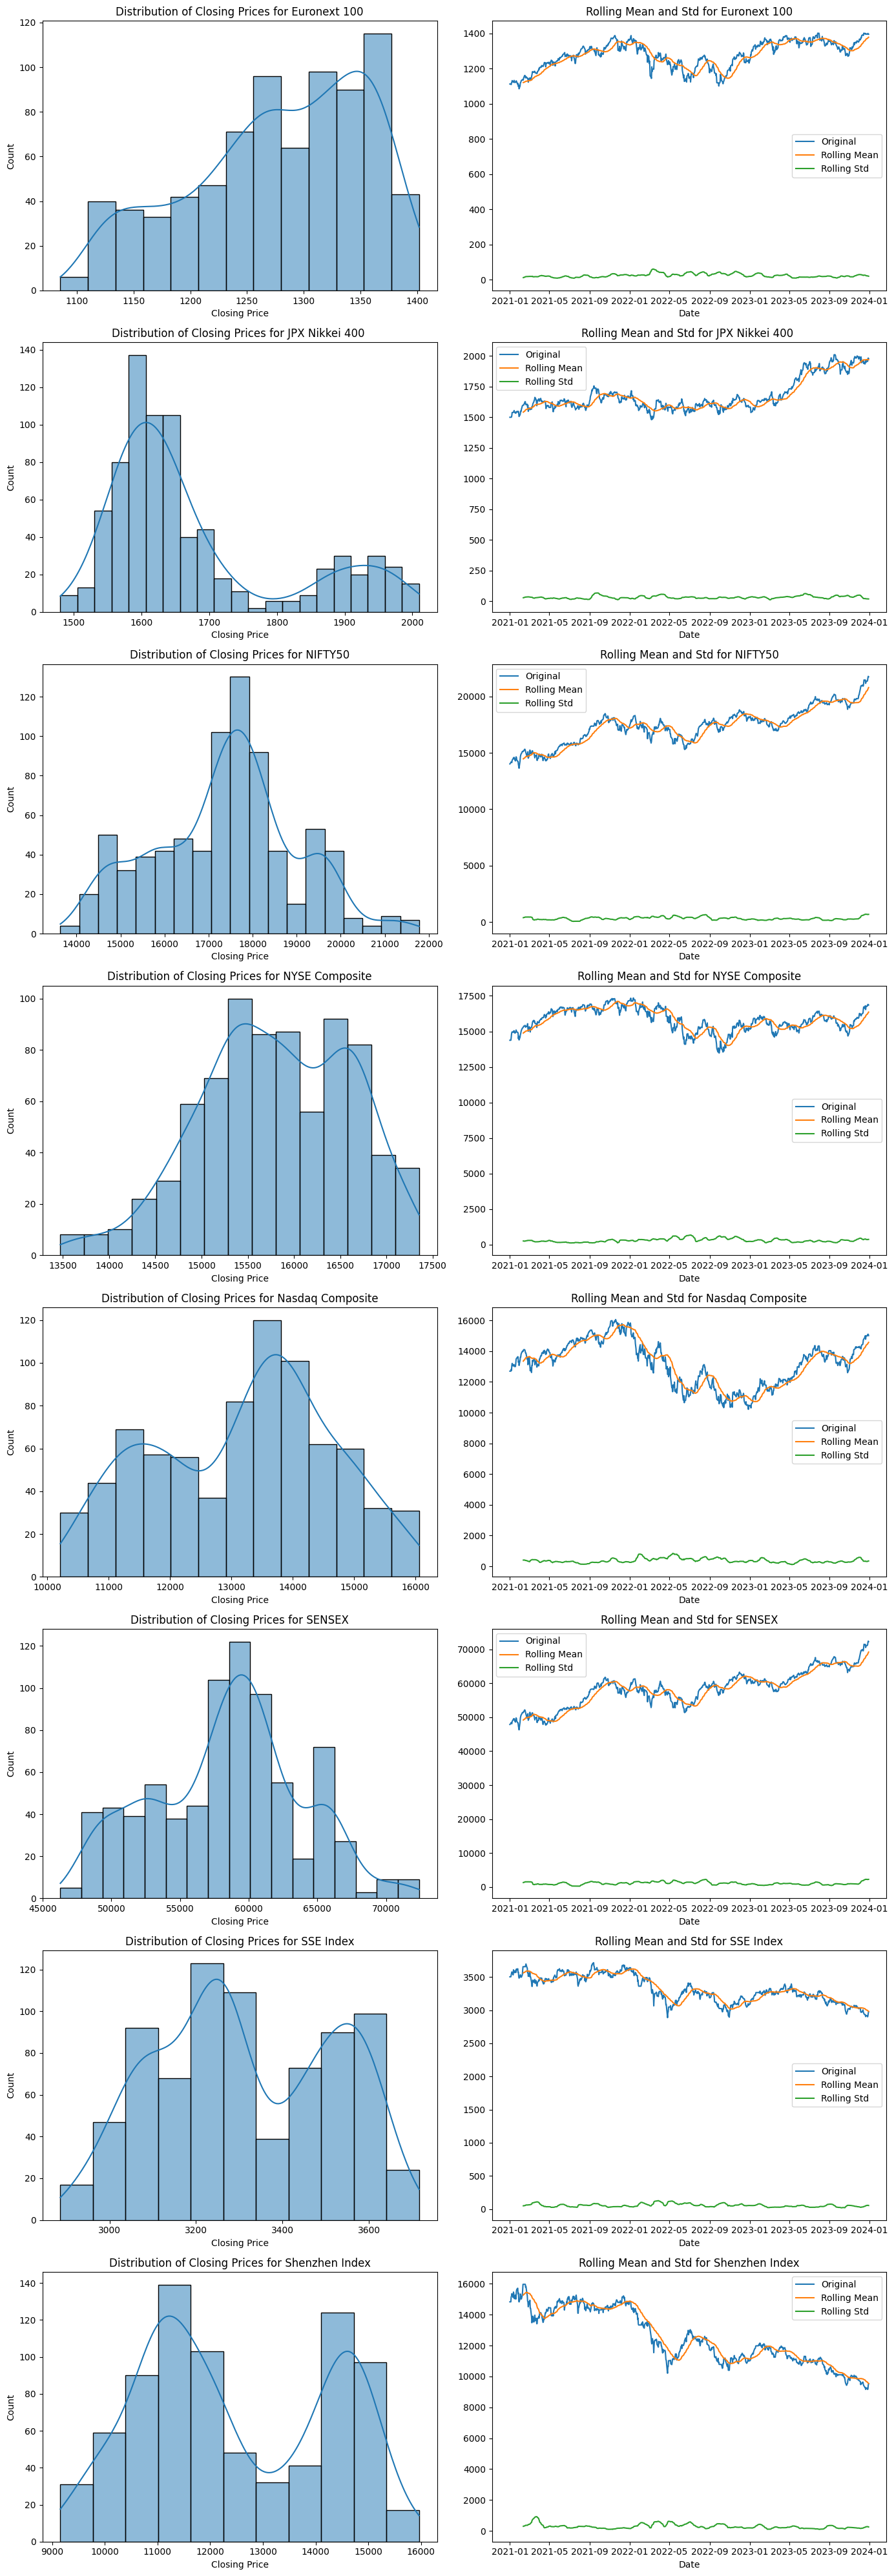

In [26]:
window_size = 30
rolling_means = closing_prices.rolling(window=window_size).mean()
rolling_stds = closing_prices.rolling(window=window_size).std()

num_level = len(data.columns.levels[1])
fig, axes = plt.subplots(num_level, 2, figsize=(14, 5 * num_level))

for i, level in enumerate(data.columns.levels[1]):
    sns.histplot(closing_prices[level], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of Closing Prices for {level}')
    axes[i, 0].set_xlabel('Closing Price')

    axes[i, 1].plot(closing_prices.index, closing_prices[level], label='Original')
    axes[i, 1].plot(rolling_means.index, rolling_means[level], label='Rolling Mean')
    axes[i, 1].plot(rolling_stds.index, rolling_stds[level], label='Rolling Std')
    axes[i, 1].set_title(f'Rolling Mean and Std for {level}')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

The plot consists of several subplots that present both the distribution of closing prices and the rolling statistics (mean and standard deviation) for various stock indices. Each row corresponds to a different stock index, with the left column showing the distribution of closing prices and the right column showing the rolling mean and standard deviation over time. Here's a detailed explanation:

***Left Column: Distribution of Closing Prices***

1. **Description**:
   - Each subplot in the left column depicts a histogram of the closing prices for a specific stock index. The histogram shows the frequency of closing prices within certain ranges, indicating how often the stock index closed at different price levels.
   - Overlaid on each histogram is a Kernel Density Estimate (KDE) plot, which provides a smoothed approximation of the distribution, highlighting the probability density function of the closing prices.

2. **Insights**:
   - The distribution shapes vary across indices, reflecting different market behaviors:
     - **Euronext 100, JPX Nikkei 400, and NIFTY50**: These show somewhat skewed distributions, indicating that most of the closing prices were concentrated around a specific range with fewer instances at the tails.
     - **NASDAQ Composite and SENSEX**: These exhibit more pronounced peaks, suggesting a clustering of closing prices around a specific central value.
     - **SSE Index and Shenzhen Index**: These show multi-modal distributions, possibly indicating different market regimes or periods of varied volatility and trading patterns.

***Right Column: Rolling Mean and Standard Deviation***

1. **Description**:
   - Each subplot on the right displays three lines:
     - **Original (Blue Line)**: Represents the actual closing prices over time for the respective index.
     - **Rolling Mean (Orange Line)**: This is the moving average calculated over a fixed window (typically 20-50 days), which smooths out short-term fluctuations and highlights longer-term trends.
     - **Rolling Standard Deviation (Green Line)**: Shows the volatility of the index, measured as the standard deviation of the prices within the rolling window. A higher standard deviation indicates more variability in the price.

2. **Insights**:
   - For most indices, the rolling mean closely follows the original price series, indicating consistent trends over time. The rolling mean's behavior helps in identifying whether the market is generally in an uptrend, downtrend, or sideways movement.
   - **Low Rolling Standard Deviation** (green line near zero) indicates periods of low volatility, where price changes are minimal. Conversely, higher spikes indicate more volatile periods.
   - Indices like **SSE Index** and **Shenzhen Index** show declining trends, reflected in the rolling means, whereas indices like **SENSEX** and **Nasdaq Composite** exhibit upward trends over the examined period.
   - Some indices, like the **NASDAQ Composite**, show periods of high volatility (higher rolling standard deviation), indicating significant price movements.


These plots provide a comprehensive view of the behavior and characteristics of different stock indices. The histograms reveal the general distribution of prices, while the rolling mean and standard deviation plots provide insights into trends and volatility over time. These visualizations are valuable for identifying patterns, understanding market dynamics, and making informed decisions in financial analysis and trading strategies. By analyzing these plots, investors and analysts can better understand how each index has behaved historically and potentially predict future movements based on observed trends and volatility patterns.

# Stationarity Check

## Augmented Dicky-Fuller Test

In [27]:
def adf_test(series, company_name):
    print(f'ADF Test for {company_name}')
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

    for key, value in result[4].items():
        print(f'Critical Values {key}: {value}')

    print('\n')

In [28]:
for level in data.columns.levels[1]:
      adf_test(data[('Close', level)], level)

ADF Test for Euronext 100
ADF Statistic: -2.5449704030764275
p-value: 0.10491230863794959
Critical Values 1%: -3.4387614757350087
Critical Values 5%: -2.865252556432172
Critical Values 10%: -2.5687469247205788


ADF Test for JPX Nikkei 400 
ADF Statistic: -1.1654589055171567
p-value: 0.6882752061405993
Critical Values 1%: -3.4387614757350087
Critical Values 5%: -2.865252556432172
Critical Values 10%: -2.5687469247205788


ADF Test for NIFTY50
ADF Statistic: -0.7678489899768539
p-value: 0.828384271064162
Critical Values 1%: -3.438804978547988
Critical Values 5%: -2.8652717302548396
Critical Values 10%: -2.5687571389759802


ADF Test for NYSE Composite
ADF Statistic: -2.777470216975602
p-value: 0.06156475116758069
Critical Values 1%: -3.4387614757350087
Critical Values 5%: -2.865252556432172
Critical Values 10%: -2.5687469247205788


ADF Test for Nasdaq Composite
ADF Statistic: -1.5816345556661697
p-value: 0.4928121730675441
Critical Values 1%: -3.4387614757350087
Critical Values 5%: -2.

The output represents the results of the Augmented Dickey-Fuller (ADF) test for eight different stock indices. The ADF test is used to determine whether a time series is stationary or contains a unit root (i.e., non-stationary).

Here’s how to interpret the results for each stock index:

***Key Terms***
- **ADF Statistic**: A negative value indicates the strength of the rejection of the null hypothesis. The more negative it is, the more likely the series is stationary.
- **p-value**: A low p-value (typically below 0.05) suggests that the null hypothesis can be rejected, meaning the time series is stationary.
- **Critical Values**: These are benchmark values for different significance levels (1%, 5%, 10%). If the ADF statistic is less than the critical value at a certain level, the null hypothesis of a unit root can be rejected.

***`Null Hypothesis (H₀)`*** :
The series has a unit root (i.e., it is non-stationary).

***`Alternative Hypothesis (H₁)`*** :
The series is stationary (i.e., no unit root).


In all cases, the null hypothesis (that the series is non-stationary) cannot be rejected at the 5% significance level. This suggests that the time series for all eight indices are non-stationary. Non-stationary time series typically require transformations (such as differencing or detrending) to make them stationary before using them in models like ARIMA or other time series forecasting methods.

## Augmented Dicky-Fuller Test with 1st Difference

In [29]:
differenced_series = {}

for level in data.columns.levels[1]:
    series = data[('Close', level)]
    differenced_series[level] = series.diff().dropna()

    adf_test(differenced_series[level], f'{level} (differenced)')

ADF Test for Euronext 100 (differenced)
ADF Statistic: -28.587717731911393
p-value: 0.0
Critical Values 1%: -3.4387723094153286
Critical Values 5%: -2.8652573313919625
Critical Values 10%: -2.5687494684274794


ADF Test for JPX Nikkei 400  (differenced)
ADF Statistic: -27.624941135665757
p-value: 0.0
Critical Values 1%: -3.4387723094153286
Critical Values 5%: -2.8652573313919625
Critical Values 10%: -2.5687494684274794


ADF Test for NIFTY50 (differenced)
ADF Statistic: -13.49751456999887
p-value: 3.02158590959931e-25
Critical Values 1%: -3.438804978547988
Critical Values 5%: -2.8652717302548396
Critical Values 10%: -2.5687571389759802


ADF Test for NYSE Composite (differenced)
ADF Statistic: -26.968739055603066
p-value: 0.0
Critical Values 1%: -3.4387723094153286
Critical Values 5%: -2.8652573313919625
Critical Values 10%: -2.5687494684274794


ADF Test for Nasdaq Composite (differenced)
ADF Statistic: -28.39958287530839
p-value: 0.0
Critical Values 1%: -3.4387723094153286
Critical V

The output represents the results of the Augmented Dickey-Fuller (ADF) test for the differenced time series of the eight stock indices. Differencing is a common technique used in time series analysis to make a non-stationary series stationary by removing trends or seasonality.

***Key Differences from the Previous ADF Test***
- The original time series for these indices were non-stationary.
- The series were differenced, and the ADF test was run again on the differenced data.

***Explanation of Results***

1. **ADF Statistic**:
  - The ADF statistics are now **very negative**, indicating that the series are much more likely to be stationary after differencing.

2. **p-value**:
  - The **p-value** for all indices is effectively 0 (or close to 0), meaning that the null hypothesis of the series having a unit root (non-stationary) is rejected with high confidence.

3. **Critical Values**:
  - The critical values remain as benchmarks to compare against the ADF statistic at different confidence levels (1%, 5%, and 10%).


After differencing, all of the stock indices have become **stationary**, as indicated by the highly negative ADF statistics and near-zero p-values. This means that the trends or non-stationary characteristics present in the original series have been removed, making the differenced series suitable for time series modeling techniques such as ARIMA.

## Plotting ACF & PACF

In [30]:
def plot_acf_pacf(series, lags=30):
    """Plot ACF and PACF and print suggested p and q values."""
    plt.figure(figsize=(12, 6))

    acf_values = acf(series, nlags=lags, fft=True)
    pacf_values = pacf(series, nlags=lags)

    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca(), alpha=0.05)
    plt.title('Autocorrelation Function (ACF)')

    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca(), alpha=0.05)
    plt.title('Partial Autocorrelation Function (PACF)')

    plt.show()

    threshold = 0.2
    acf_cutoff = np.where(np.abs(acf_values) < threshold)[0]
    pacf_cutoff = np.where(np.abs(pacf_values) < threshold)[0]

    p = pacf_cutoff[0] if len(pacf_cutoff) > 0 else lags
    q = acf_cutoff[0] if len(acf_cutoff) > 0 else lags

    print(f'Suggested p (AR order): {p}')
    print(f'Suggested q (MA order): {q}')

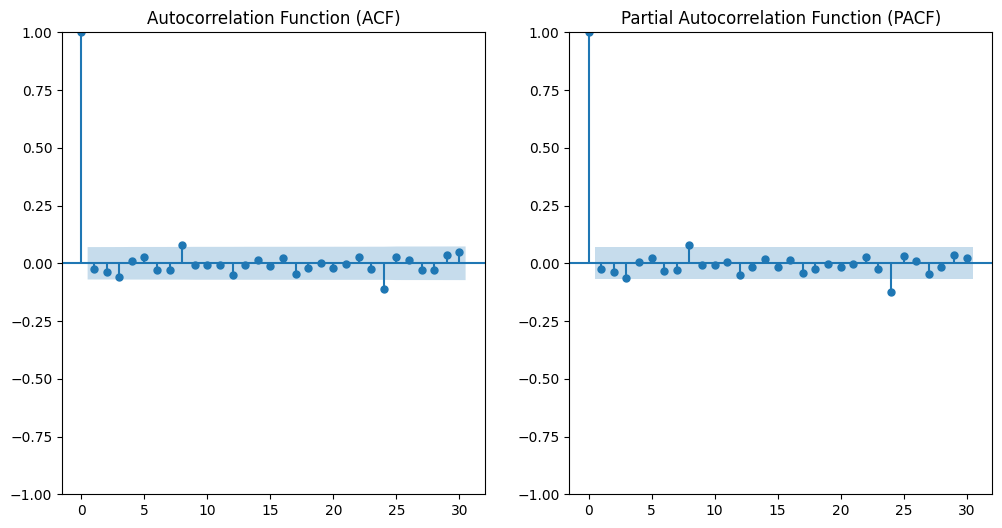

Suggested p (AR order): 1
Suggested q (MA order): 1


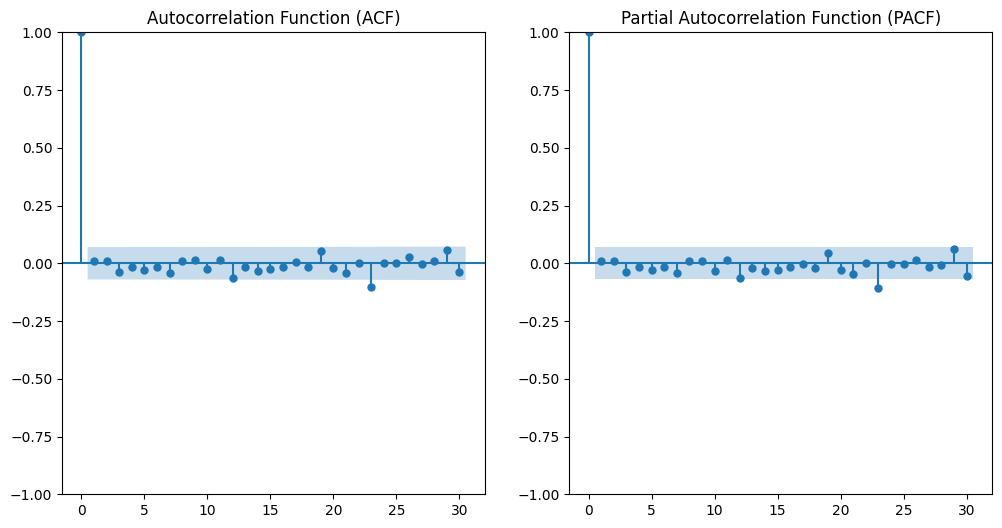

Suggested p (AR order): 1
Suggested q (MA order): 1


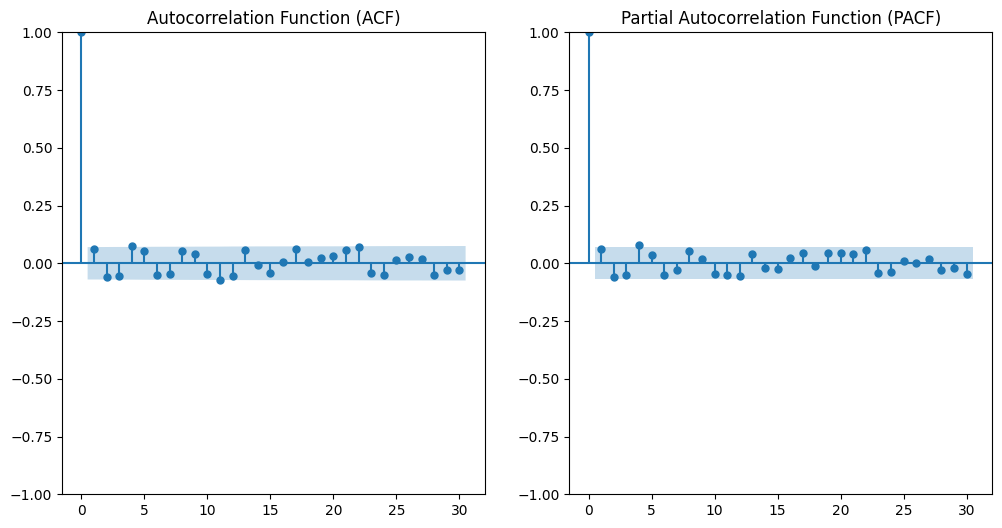

Suggested p (AR order): 1
Suggested q (MA order): 1


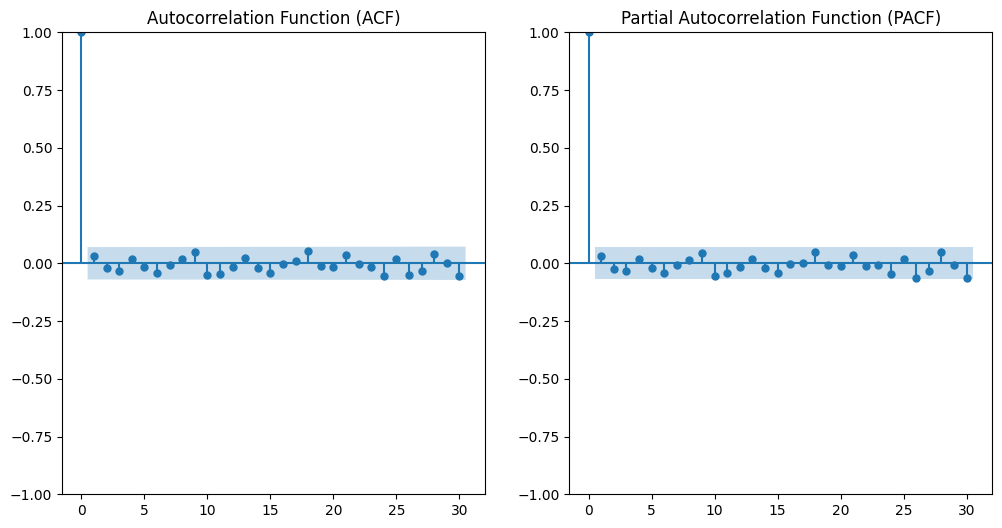

Suggested p (AR order): 1
Suggested q (MA order): 1


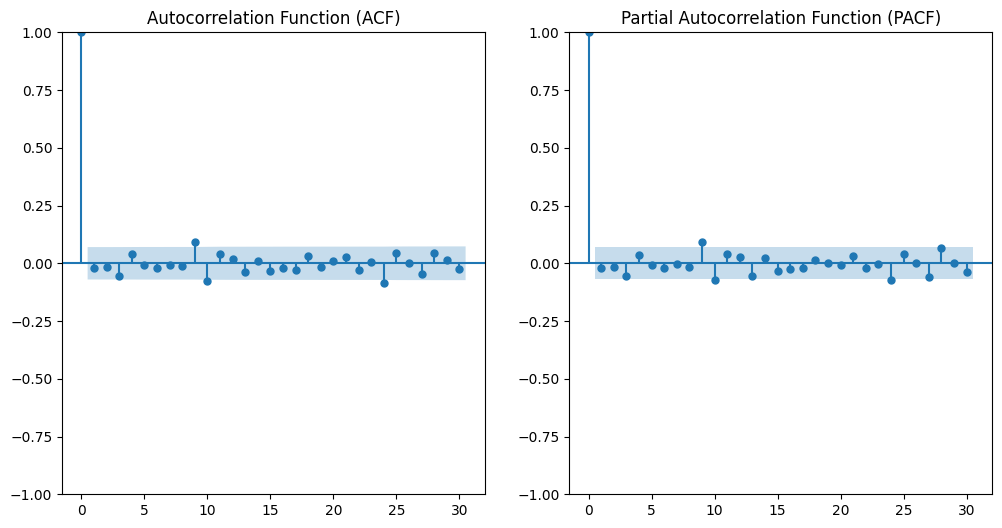

Suggested p (AR order): 1
Suggested q (MA order): 1


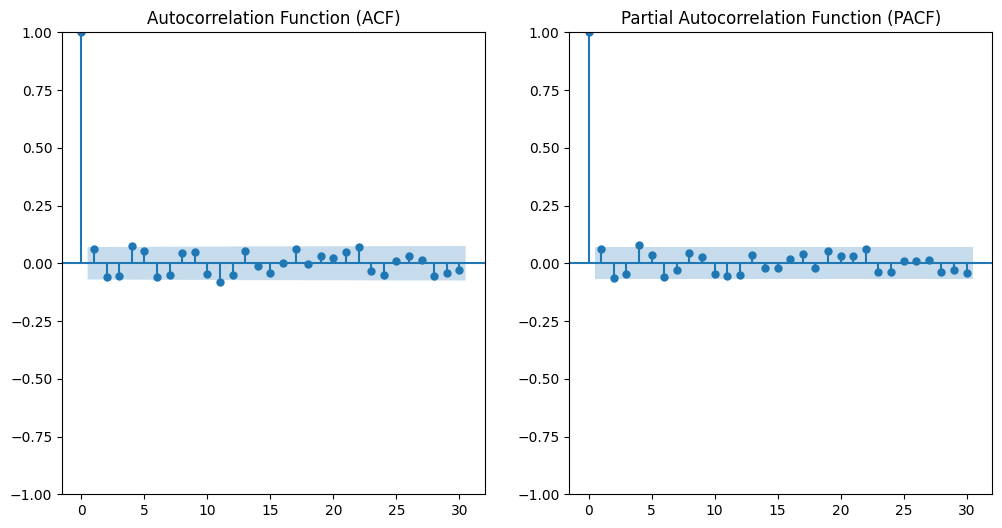

Suggested p (AR order): 1
Suggested q (MA order): 1


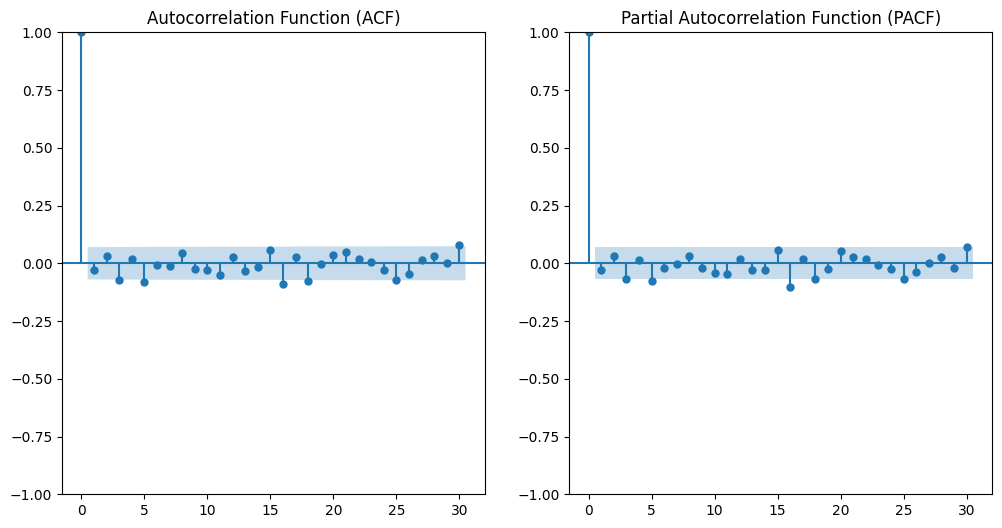

Suggested p (AR order): 1
Suggested q (MA order): 1


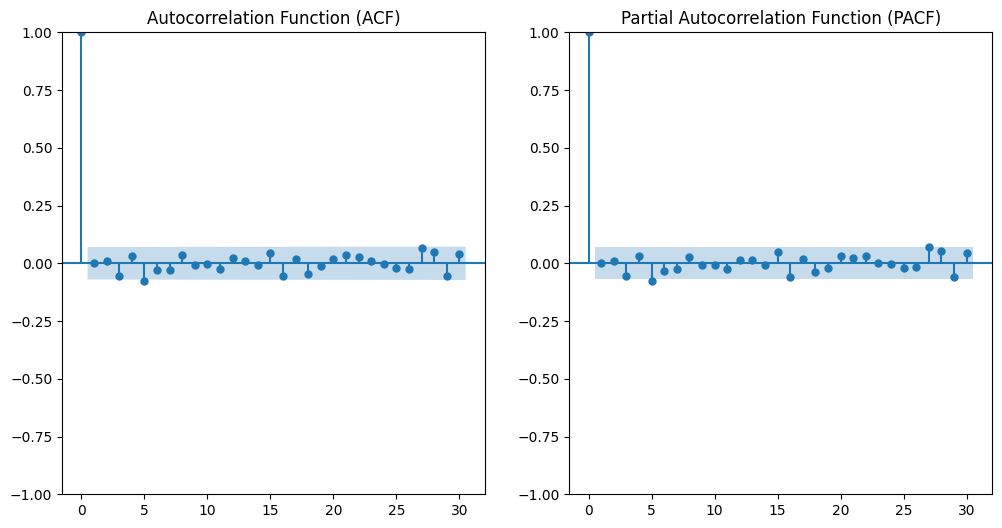

Suggested p (AR order): 1
Suggested q (MA order): 1


In [31]:
for ticker in data.columns.levels[1]:
    series = differenced_series[ticker]
    plot_acf_pacf(series, lags=30)

# Splitting the Data

## Defining the Splitting Points

In [32]:
train_end = '2022-12-31'
val_start = '2023-01-01'

## Splitting

In [33]:
train_data = {}
val_data = {}

In [34]:
for level, series in differenced_series.items():
    if not isinstance(series, pd.DataFrame):
        series = series.to_frame(name=level)

    train_data[level] = series.loc[:train_end]
    val_data[level] = series.loc[val_start:]

In [35]:
train_data_df = pd.concat(train_data.values(), axis=1)
val_data_df = pd.concat(val_data.values(), axis=1)

In [36]:
train_data_df.shape, val_data_df.shape

((520, 8), (260, 8))

In [37]:
train_data_df.head()

Euronext 100  JPX Nikkei 400      NIFTY50  \
Date                                                                   
2021-01-04 00:00:00+00:00      0.000000              0.0  114.400391   
2021-01-05 00:00:00+00:00     -2.959961              0.0   66.599609   
2021-01-06 00:00:00+00:00     10.669922              2.0  -53.250000   
2021-01-07 00:00:00+00:00      1.900024             13.0   -8.900391   
2021-01-08 00:00:00+00:00      9.969971             24.0  209.900391   

                           NYSE Composite  Nasdaq Composite      SENSEX  \
Date                                                                      
2021-01-04 00:00:00+00:00        0.000000          0.000000  307.820312   
2021-01-05 00:00:00+00:00      159.830078        120.509766  260.980469   
2021-01-06 00:00:00+00:00      252.309570        -78.169922 -263.722656   
2021-01-07 00:00:00+00:00      139.910156        326.690430  -80.738281   
2021-01-08 00:00:00+00:00       38.080078        134.500000  689.191406   

                           SSE Index  Shenzhen Index  
Date                                                  
2021-01-04 00:00:00+00:00   0.000000        0.000000  
2021-01-05 00:00:00+00:00  25.718994      320.100586  
2021-01-06 00:00:00+00:00  22.199951       40.040039  
2021-01-07 00:00:00+00:00  25.328125      168.790039  
2021-01-08 00:00:00+00:00  -6.094971      -37.110352

In [38]:
train_data_df.index = train_data_df.index.astype(str).str.replace('00:00:00+00:00', '')

In [39]:
train_data_df.head()

Euronext 100  JPX Nikkei 400      NIFTY50  NYSE Composite  \
Date                                                                     
2021-01-04       0.000000              0.0  114.400391        0.000000   
2021-01-05      -2.959961              0.0   66.599609      159.830078   
2021-01-06      10.669922              2.0  -53.250000      252.309570   
2021-01-07       1.900024             13.0   -8.900391      139.910156   
2021-01-08       9.969971             24.0  209.900391       38.080078   

             Nasdaq Composite      SENSEX  SSE Index  Shenzhen Index  
Date                                                                  
2021-01-04           0.000000  307.820312   0.000000        0.000000  
2021-01-05         120.509766  260.980469  25.718994      320.100586  
2021-01-06         -78.169922 -263.722656  22.199951       40.040039  
2021-01-07         326.690430  -80.738281  25.328125      168.790039  
2021-01-08         134.500000  689.191406  -6.094971      -37.110352

In [40]:
val_data_df.tail()

Euronext 100  JPX Nikkei 400      NIFTY50  \
Date                                                                   
2023-12-25 00:00:00+00:00      0.000000              0.0    0.000000   
2023-12-26 00:00:00+00:00      0.000000             -3.0   91.949219   
2023-12-27 00:00:00+00:00      3.930054             22.0  213.400391   
2023-12-28 00:00:00+00:00     -5.250000              6.0  123.949219   
2023-12-29 00:00:00+00:00      0.630005             -5.0  -47.298828   

                           NYSE Composite  Nasdaq Composite      SENSEX  \
Date                                                                      
2023-12-25 00:00:00+00:00        0.000000          0.000000    0.000000   
2023-12-26 00:00:00+00:00       89.041016         81.600586  229.835938   
2023-12-27 00:00:00+00:00       38.849609         24.609375  701.632812   
2023-12-28 00:00:00+00:00       -7.759766         -4.040039  371.953125   
2023-12-29 00:00:00+00:00      -37.689453        -83.790039 -170.125000   

                           SSE Index  Shenzhen Index  
Date                                                  
2023-12-25 00:00:00+00:00   4.038086       34.970703  
2023-12-26 00:00:00+00:00 -19.933105      -99.030273  
2023-12-27 00:00:00+00:00  15.734131       34.490234  
2023-12-28 00:00:00+00:00  40.090088      249.309570  
2023-12-29 00:00:00+00:00  20.230957       83.640625

In [41]:
val_data_df.index = val_data_df.index.astype(str).str.replace('00:00:00+00:00', '')

In [42]:
val_data_df.head()

Euronext 100  JPX Nikkei 400      NIFTY50  NYSE Composite  \
Date                                                                     
2023-01-02      20.420044              0.0   92.148438        0.000000   
2023-01-03       5.339966              0.0   35.101562      -29.859375   
2023-01-04      21.739990            -24.0 -189.601562      195.849609   
2023-01-05      -3.369995            -21.0  -50.798828     -124.899414   
2023-01-06      18.580078              7.0 -132.701172      314.339844   

             Nasdaq Composite      SENSEX  SSE Index  Shenzhen Index  
Date                                                                  
2023-01-02           0.000000  327.050781   0.000000        0.000000  
2023-01-03         -79.500000  126.410156  27.250000      101.139648  
2023-01-04          71.779297 -636.750000   7.010010      -21.759766  
2023-01-05        -153.519531 -304.179688  31.699951      236.639648  
2023-01-06         264.049805 -452.898438   2.419922       35.720703

# Model Training

In [43]:
train_data_len = len(train_data_df)
val_data_len = len(val_data_df)
train_data_len, val_data_len

(520, 260)

In [44]:
train_start_date = pd.to_datetime('2021-01-05')
val_start_date = pd.to_datetime('2023-01-03')

In [45]:
train_data_df.index = pd.date_range(start=train_start_date,
                                    periods=train_data_len,
                                    freq='B')

val_data_df.index = pd.date_range(start=val_start_date,
                                  periods=val_data_len,
                                  freq='B')

In [46]:
forecast_results = {}
validation_scores = {}

## Fit the ARIMA Model and Validate

In [47]:
for level in train_data_df.columns:
    print(f"Processing {level}...")

    train_series = train_data_df[level]
    val_series = val_data_df[level]

    model = ARIMA(train_series, order=(1, 1, 1))
    model_fit = model.fit()

    forecast = model_fit.get_forecast(steps=len(val_series))
    forecast_values = forecast.predicted_mean

    forecast_results[level] = forecast_values

    mse = mean_squared_error(val_series, forecast_values)
    mae = mean_absolute_error(val_series, forecast_values)
    rmse = np.sqrt(mse)

    validation_scores[level] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

    print(f"{level} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
    print("\n")

Processing Euronext 100...
Euronext 100 - MSE: 110.81834537084039, MAE: 7.906744051309642, RMSE: 10.527029275671289


Processing JPX Nikkei 400 ...
JPX Nikkei 400  - MSE: 253.60604777005395, MAE: 12.245057071244323, RMSE: 15.925013273779522


Processing NIFTY50...
NIFTY50 - MSE: 12823.315479889741, MAE: 87.93702240947812, RMSE: 113.24007894685407


Processing NYSE Composite...
NYSE Composite - MSE: 14174.951972016788, MAE: 92.28732279859088, RMSE: 119.05860729916502


Processing Nasdaq Composite...
Nasdaq Composite - MSE: 18808.858316566173, MAE: 107.6221540531732, RMSE: 137.14539116049863


Processing SENSEX...
SENSEX - MSE: 147610.9934831296, MAE: 297.0974177387134, RMSE: 384.2017614263755


Processing SSE Index...
SSE Index - MSE: 501.46611069815833, MAE: 16.942412921119878, RMSE: 22.39343901007968


Processing Shenzhen Index...
Shenzhen Index - MSE: 9514.987491768808, MAE: 75.25559496145974, RMSE: 97.5447973587972




In [48]:
for level, scores in validation_scores.items():
    print(f"{level} - MSE: {scores['MSE']}, MAE: {scores['MAE']}, RMSE: {scores['RMSE']}")
    print("\n")

Euronext 100 - MSE: 110.81834537084039, MAE: 7.906744051309642, RMSE: 10.527029275671289


JPX Nikkei 400  - MSE: 253.60604777005395, MAE: 12.245057071244323, RMSE: 15.925013273779522


NIFTY50 - MSE: 12823.315479889741, MAE: 87.93702240947812, RMSE: 113.24007894685407


NYSE Composite - MSE: 14174.951972016788, MAE: 92.28732279859088, RMSE: 119.05860729916502


Nasdaq Composite - MSE: 18808.858316566173, MAE: 107.6221540531732, RMSE: 137.14539116049863


SENSEX - MSE: 147610.9934831296, MAE: 297.0974177387134, RMSE: 384.2017614263755


SSE Index - MSE: 501.46611069815833, MAE: 16.942412921119878, RMSE: 22.39343901007968


Shenzhen Index - MSE: 9514.987491768808, MAE: 75.25559496145974, RMSE: 97.5447973587972




# Forecasting

In [49]:
# Define the forecast period (6 months of trading days, assuming 21 trading days per month)
forecast_period = 6 * 21  # Approximate number of trading days in 6 months
forecast_period

126

In [50]:
forecast_results = {}

for ticker in differenced_series.keys():
    print(f"Forecasting for {ticker}...")

    diff_series = differenced_series[ticker]

    model = ARIMA(diff_series, order=(1, 1, 1))
    model_fit = model.fit()

    forecast = model_fit.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    forecast_results[ticker] = {'values': forecast_values, 'ci': forecast_ci}

Forecasting for Euronext 100...
Forecasting for JPX Nikkei 400 ...
Forecasting for NIFTY50...
Forecasting for NYSE Composite...
Forecasting for Nasdaq Composite...
Forecasting for SENSEX...
Forecasting for SSE Index...
Forecasting for Shenzhen Index...


## Forecast Results for the First 6 Months of 2024

In [51]:
for level, forecast in forecast_results.items():
    print(f"{level} - Forecast for first six months of 2024:")
    print(forecast)
    print("\n")

Euronext 100 - Forecast for first six months of 2024:
{'values': 2024-01-01 00:00:00+00:00    0.356419
2024-01-02 00:00:00+00:00    0.362977
2024-01-03 00:00:00+00:00    0.362819
2024-01-04 00:00:00+00:00    0.362823
2024-01-05 00:00:00+00:00    0.362823
                               ...   
2024-06-18 00:00:00+00:00    0.362823
2024-06-19 00:00:00+00:00    0.362823
2024-06-20 00:00:00+00:00    0.362823
2024-06-21 00:00:00+00:00    0.362823
2024-06-24 00:00:00+00:00    0.362823
Freq: B, Name: predicted_mean, Length: 126, dtype: float64, 'ci':                            lower ('Close', 'Euronext 100')  \
2024-01-01 00:00:00+00:00                       -24.466071   
2024-01-02 00:00:00+00:00                       -24.465880   
2024-01-03 00:00:00+00:00                       -24.466059   
2024-01-04 00:00:00+00:00                       -24.466055   
2024-01-05 00:00:00+00:00                       -24.466055   
...                                                    ...   
2024-06-18 00:00:

In [52]:
forecast_results_df = pd.DataFrame(forecast_results)
forecast_results_df.head()

Euronext 100  \
values  2024-01-01 00:00:00+00:00    0.356419
2024-01-...   
ci                                 lower ('Close', 'Eu...   

                                          JPX Nikkei 400   \
values  2024-01-01 00:00:00+00:00    0.557411
2024-01-...   
ci                                 lower ('Close', 'JP...   

                                                  NIFTY50  \
values  2024-01-01 00:00:00+00:00     6.549766
2024-01...   
ci                                 lower ('Close', 'NI...   

                                           NYSE Composite  \
values  2024-01-01 00:00:00+00:00    1.844231
2024-01-...   
ci                                 lower ('Close', 'NY...   

                                         Nasdaq Composite  \
values  2024-01-01 00:00:00+00:00    4.765083
2024-01-...   
ci                                 lower ('Close', 'Na...   

                                                   SENSEX  \
values  2024-01-01 00:00:00+00:00    18.280125
2024-01...   
ci                                 lower ('Close', 'SE...   

                                                SSE Index  \
values  2024-01-01 00:00:00+00:00   -1.220233
2024-01-...   
ci                                 lower ('Close', 'SS...   

                                           Shenzhen Index  
values  2024-01-01 00:00:00+00:00   -6.600496
2024-01-...  
ci                                 lower ('Close', 'Sh...

In [53]:
forecast_results_df.iloc[0] = forecast_results_df.iloc[0].astype(str).str.replace('\n', ' ')

In [54]:
forecast_results_df.head()

Euronext 100  \
values  2024-01-01 00:00:00+00:00    0.356419 2024-01-...   
ci                                 lower ('Close', 'Eu...   

                                          JPX Nikkei 400   \
values  2024-01-01 00:00:00+00:00    0.557411 2024-01-...   
ci                                 lower ('Close', 'JP...   

                                                  NIFTY50  \
values  2024-01-01 00:00:00+00:00     6.549766 2024-01...   
ci                                 lower ('Close', 'NI...   

                                           NYSE Composite  \
values  2024-01-01 00:00:00+00:00    1.844231 2024-01-...   
ci                                 lower ('Close', 'NY...   

                                         Nasdaq Composite  \
values  2024-01-01 00:00:00+00:00    4.765083 2024-01-...   
ci                                 lower ('Close', 'Na...   

                                                   SENSEX  \
values  2024-01-01 00:00:00+00:00    18.280125 2024-01...   
ci                                 lower ('Close', 'SE...   

                                                SSE Index  \
values  2024-01-01 00:00:00+00:00   -1.220233 2024-01-...   
ci                                 lower ('Close', 'SS...   

                                           Shenzhen Index  
values  2024-01-01 00:00:00+00:00   -6.600496 2024-01-...  
ci                                 lower ('Close', 'Sh...

### Saving the Forecasted Results

In [55]:
forecast_results_df.to_csv('arima_results.csv')

## Plot of the Confidencce Intervals for Each Index

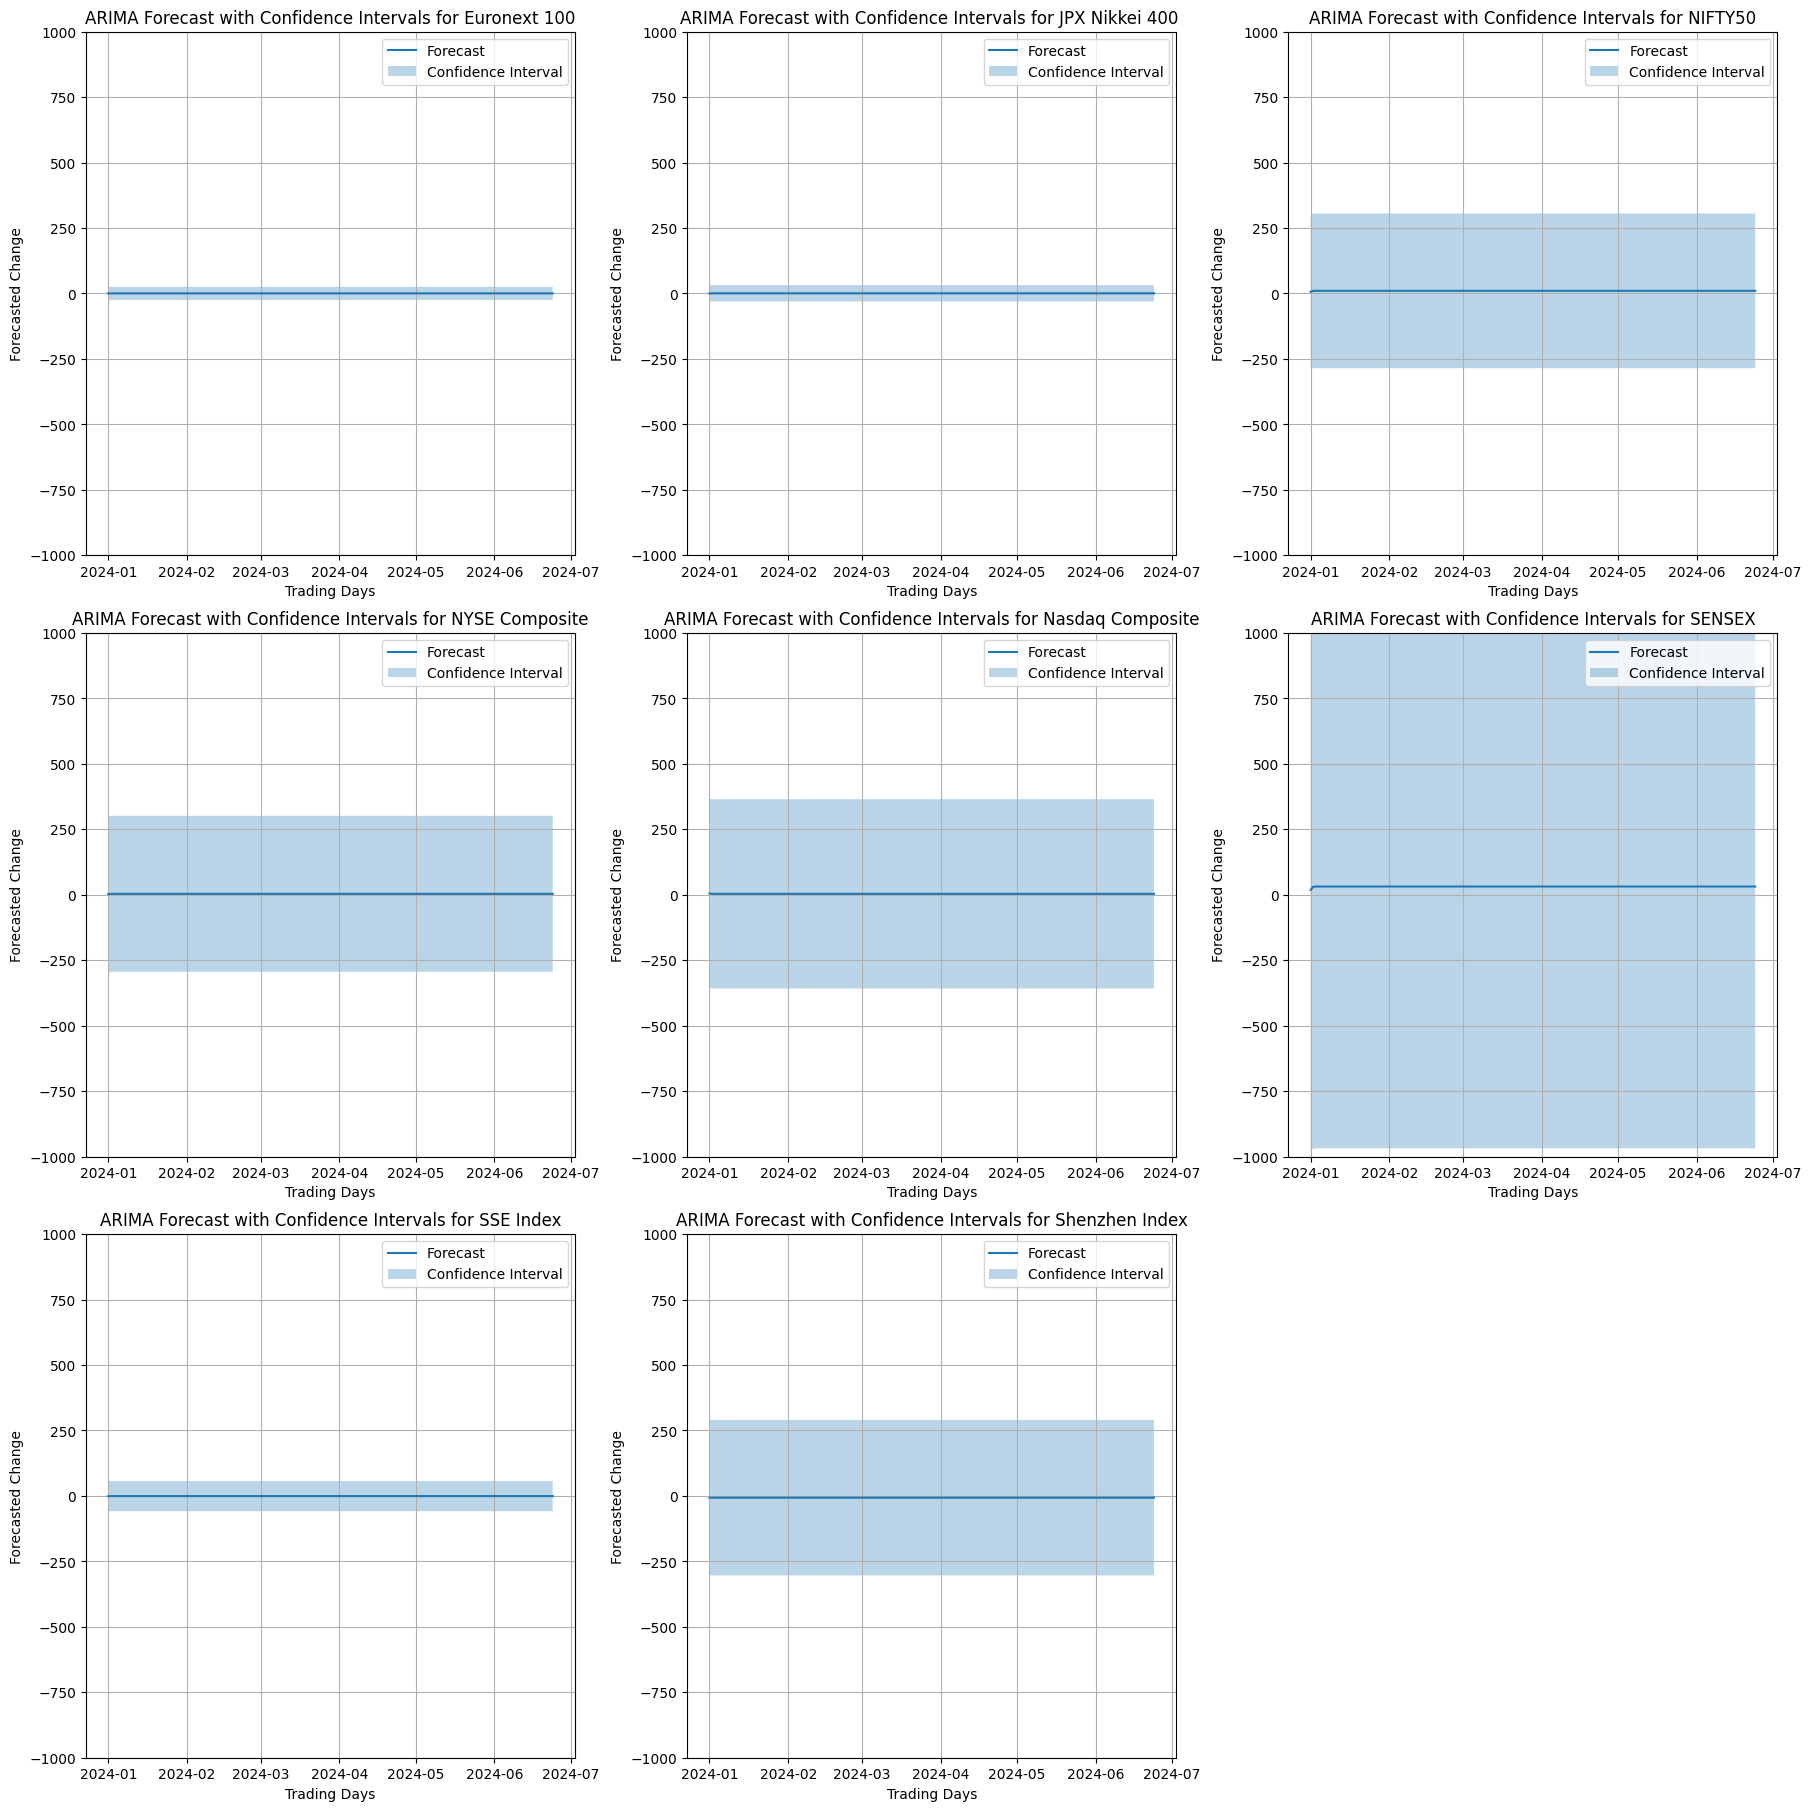

In [56]:
num_levels = len(forecast_results)
num_rows = math.ceil(num_levels / 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, (level, forecast_data) in enumerate(forecast_results.items()):
    forecast = forecast_data['values']
    forecast_ci = forecast_data['ci']

    ax = axes[i]
    ax.plot(forecast.index, forecast, label='Forecast')
    ax.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.3, label='Confidence Interval')
    ax.set_title(f'ARIMA Forecast with Confidence Intervals for {level}')
    ax.set_xlabel('Trading Days')
    ax.set_ylabel('Forecasted Change')
    ax.set_ylim(-1000, 1000)
    ax.legend()
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

These multiple subplots representing **ARIMA forecasts with confidence intervals** for various stock indices. Each subplot shows the forecasted change in stock price for a particular index over a specified future time period, along with confidence intervals to indicate the level of uncertainty in the forecast.

***Breakdown of Each Component***:

1. **Title**:
   Each subplot is labeled with the title format **"ARIMA Forecast with Confidence Intervals for [Stock Index]"**, indicating that the forecast is generated using an ARIMA (AutoRegressive Integrated Moving Average) model. The stock indices being forecasted include:
   - **Euronext 100**
   - **JPX Nikkei 400**
   - **NIFTY50**
   - **NYSE Composite**
   - **Nasdaq Composite**
   - **SENSEX**
   - **SSE Index**
   - **Shenzhen Index**

2. **X-Axis (Trading Days)**:
   - The x-axis represents **future trading days** from the forecast's starting point, running from early 2024 to approximately July 2024.

3. **Y-Axis (Forecasted Change)**:
   - The y-axis represents the **forecasted change** in the stock price. The values indicate how much the price is expected to change in the future relative to the current price, in either positive (increase) or negative (decrease) directions.

4. **Forecast Line (Blue Line)**:
   - The central blue line represents the **point forecast** of the ARIMA model. This is the model's best estimate of the future value of the stock index.

5. **Confidence Interval (Shaded Area)**:
   - The light blue shaded area around the forecast line represents the **confidence interval**, typically at 95%. This indicates the range within which the actual future values are expected to fall with a certain probability.
   - A **narrower confidence interval** suggests that the model is more confident in its forecast, while a **wider interval** indicates more uncertainty.

***Observations for Each Index***:

1. **Euronext 100, JPX Nikkei 400, NIFTY50, NYSE Composite**:
   - The forecasts for these indices show relatively **flat lines**, indicating minimal change is expected in their prices over the forecast period.
   - The confidence intervals are also narrow and centered around zero, suggesting a high level of confidence that the prices will remain stable or close to their current levels.

2. **Nasdaq Composite, SENSEX**:
   - For the **Nasdaq Composite** and **SENSEX**, the forecast lines are relatively flat, but the confidence intervals are **much wider** than the previous indices, indicating greater uncertainty in the model's predictions.
   - In particular, the **SENSEX** has a very wide confidence interval, indicating a broader range of possible outcomes, including large potential price changes (either positive or negative).

3. **SSE Index, Shenzhen Index**:
   - These indices also show flat forecasts, with relatively wide confidence intervals, particularly for the **Shenzhen Index**. This suggests uncertainty in the prediction, meaning the actual price could fluctuate significantly from the forecast.

***Summary***
- **Minimal Forecasted Change**: Most of the indices show little expected change in their forecasted prices according to the ARIMA model. The flat lines suggest that the ARIMA model anticipates stability in the stock prices for these indices.
- **Confidence in Stability**: Some indices (e.g., **Euronext 100, JPX Nikkei 400, NIFTY50**) have narrow confidence intervals, indicating a higher confidence in the forecasted stability.
- **Higher Uncertainty**: Indices like the **Nasdaq Composite**, **SENSEX**, and **Shenzhen Index** have wider confidence intervals, reflecting higher uncertainty in the forecast, with the potential for larger price movements.

This plot provides a visual representation of the ARIMA model's forecasts and the range of possible outcomes, helping to assess both the expected change in stock prices and the uncertainty around those predictions.

## Integrate the differenced forecast back to the original scale

In [57]:
integrated_forecast_results = {}

for level in forecast_results.keys():
    print(f"Integrating forecast for {level}...")

    original_series = data[('Close', level)]
    last_observed = original_series.iloc[-1]

    forecast_diff = forecast_results[level]['values']

    integrated_forecast = forecast_diff.cumsum() + last_observed

    integrated_forecast_results[level] = integrated_forecast

Integrating forecast for Euronext 100...
Integrating forecast for JPX Nikkei 400 ...
Integrating forecast for NIFTY50...
Integrating forecast for NYSE Composite...
Integrating forecast for Nasdaq Composite...
Integrating forecast for SENSEX...
Integrating forecast for SSE Index...
Integrating forecast for Shenzhen Index...


In [58]:
integrated_forecast_df = pd.DataFrame(integrated_forecast_results)

In [59]:
integrated_forecast_df.head()

Euronext 100  JPX Nikkei 400        NIFTY50  \
2024-01-01 00:00:00+00:00   1395.876439      1978.557411  21737.950156   
2024-01-02 00:00:00+00:00   1396.239416      1979.171484  21747.905518   
2024-01-03 00:00:00+00:00   1396.602235      1979.786134  21758.076264   
2024-01-04 00:00:00+00:00   1396.965058      1980.400791  21768.260631   
2024-01-05 00:00:00+00:00   1397.327881      1981.015448  21778.445859   

                           NYSE Composite  Nasdaq Composite        SENSEX  \
2024-01-01 00:00:00+00:00    16854.734856      15016.114692  72258.537937   
2024-01-02 00:00:00+00:00    16857.931613      15019.320892  72288.942645   
2024-01-03 00:00:00+00:00    16861.174642      15022.554534  72320.127615   
2024-01-04 00:00:00+00:00    16864.419254      15025.787693  72351.362797   
2024-01-05 00:00:00+00:00    16867.663920      15029.020861  72382.601212   

                             SSE Index  Shenzhen Index  
2024-01-01 00:00:00+00:00  2973.714826     9518.089934  
2024-01-02 00:00:00+00:00  2973.050779     9511.285702  
2024-01-03 00:00:00+00:00  2972.372312     9504.481010  
2024-01-04 00:00:00+00:00  2971.694218     9497.676317  
2024-01-05 00:00:00+00:00  2971.016115     9490.871624

In [60]:
integrated_forecast_df.describe()

Euronext 100  JPX Nikkei 400        NIFTY50  NYSE Composite  \
count    126.000000       126.000000    126.000000      126.000000   
mean    1418.553036      2016.972866  22374.287211    17057.477415   
std       13.249259        22.445482    371.933749      118.485231   
min     1395.876439      1978.557411  21737.950156    16854.734856   
25%     1407.214813      1997.764841  22055.994920    16956.081127   
50%     1418.553037      2016.972861  22374.285132    17057.477007   
75%     1429.891261      2036.180881  22692.575343    17158.872887   
max     1441.229485      2055.388901  23010.865555    17260.268767   

       Nasdaq Composite        SENSEX    SSE Index  Shenzhen Index  
count        126.000000    126.000000   126.000000      126.000000  
mean       15218.161350  74210.068994  2931.346986     9092.797078  
std          118.065597   1140.731991    24.762184      248.487781  
min        15016.114692  72258.537937  2888.965658     8667.503767  
25%        15117.124668  73233.854042  2910.156375     8880.150424  
50%        15218.161144  74210.061434  2931.347092     9092.797081  
75%        15319.197620  75186.268826  2952.537809     9305.443739  
max        15420.234096  76162.476218  2973.714826     9518.089934

In [61]:
integrated_forecast_df.index.name = 'Date'
integrated_forecast_df.head()

Euronext 100  JPX Nikkei 400        NIFTY50  \
Date                                                                     
2024-01-01 00:00:00+00:00   1395.876439      1978.557411  21737.950156   
2024-01-02 00:00:00+00:00   1396.239416      1979.171484  21747.905518   
2024-01-03 00:00:00+00:00   1396.602235      1979.786134  21758.076264   
2024-01-04 00:00:00+00:00   1396.965058      1980.400791  21768.260631   
2024-01-05 00:00:00+00:00   1397.327881      1981.015448  21778.445859   

                           NYSE Composite  Nasdaq Composite        SENSEX  \
Date                                                                        
2024-01-01 00:00:00+00:00    16854.734856      15016.114692  72258.537937   
2024-01-02 00:00:00+00:00    16857.931613      15019.320892  72288.942645   
2024-01-03 00:00:00+00:00    16861.174642      15022.554534  72320.127615   
2024-01-04 00:00:00+00:00    16864.419254      15025.787693  72351.362797   
2024-01-05 00:00:00+00:00    16867.663920      15029.020861  72382.601212   

                             SSE Index  Shenzhen Index  
Date                                                    
2024-01-01 00:00:00+00:00  2973.714826     9518.089934  
2024-01-02 00:00:00+00:00  2973.050779     9511.285702  
2024-01-03 00:00:00+00:00  2972.372312     9504.481010  
2024-01-04 00:00:00+00:00  2971.694218     9497.676317  
2024-01-05 00:00:00+00:00  2971.016115     9490.871624

In [62]:
integrated_forecast_df.index = integrated_forecast_df.index.astype(str).str.replace('00:00:00+00:00', '')

In [63]:
integrated_forecast_df.head()

Euronext 100  JPX Nikkei 400        NIFTY50  NYSE Composite  \
Date                                                                       
2024-01-01    1395.876439      1978.557411  21737.950156    16854.734856   
2024-01-02    1396.239416      1979.171484  21747.905518    16857.931613   
2024-01-03    1396.602235      1979.786134  21758.076264    16861.174642   
2024-01-04    1396.965058      1980.400791  21768.260631    16864.419254   
2024-01-05    1397.327881      1981.015448  21778.445859    16867.663920   

             Nasdaq Composite        SENSEX    SSE Index  Shenzhen Index  
Date                                                                      
2024-01-01       15016.114692  72258.537937  2973.714826     9518.089934  
2024-01-02       15019.320892  72288.942645  2973.050779     9511.285702  
2024-01-03       15022.554534  72320.127615  2972.372312     9504.481010  
2024-01-04       15025.787693  72351.362797  2971.694218     9497.676317  
2024-01-05       15029.020861  72382.601212  2971.016115     9490.871624

### Saving the Integrated Forecast Dataset

In [64]:
integrated_forecast_df.to_csv('integrated_forecast_2024.csv')

## Forecaste for First 6 Months

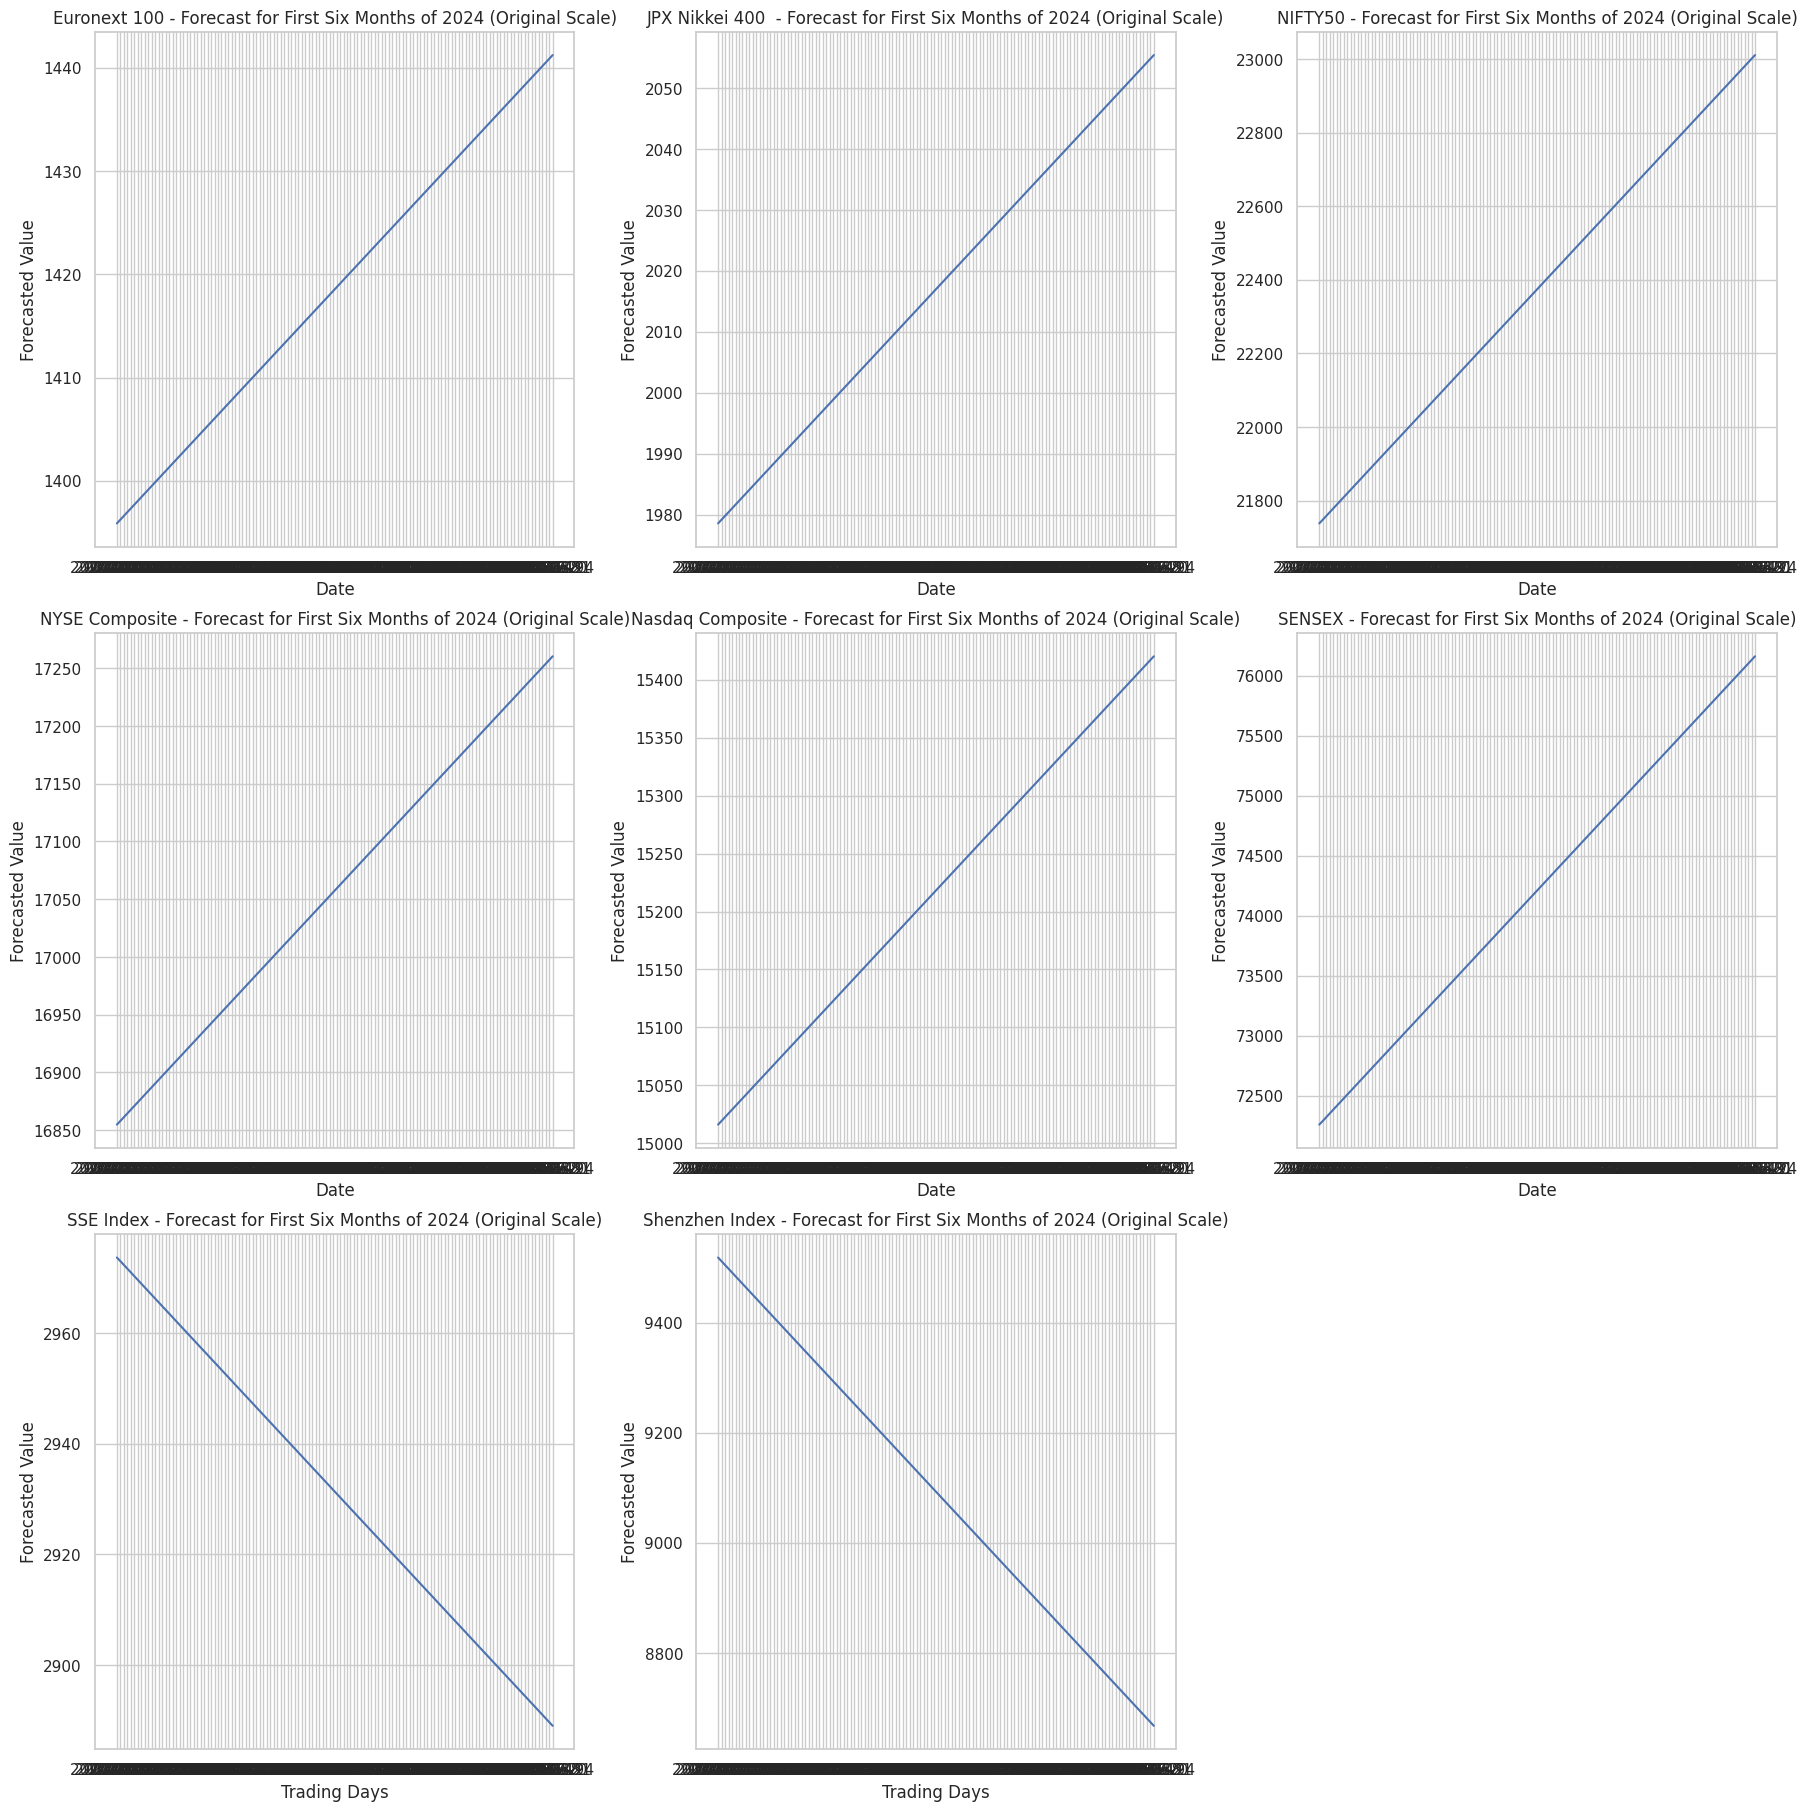

In [65]:
sns.set(style="whitegrid")

num_levels = len(integrated_forecast_df.columns)
num_rows = math.ceil(num_levels / 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, level in enumerate(integrated_forecast_df.columns):
    sns.lineplot(data=integrated_forecast_df[level], ax=axes[i])
    axes[i].set_title(f'{level} - Forecast for First Six Months of 2024 (Original Scale)')
    axes[i].set_ylabel('Forecasted Value')

for ax in axes[-3:]:
    ax.set_xlabel('Trading Days')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

The image displays multiple subplots that represent **forecasted values for the first six months of 2024** for various stock indices, plotted on their **original scales**. Here's a detailed explanation of each component of the plot:

***Key Aspects***:

1. **Subplots for Different Indices**:
   - Each subplot is labeled with the respective stock index and indicates that it shows the forecasted values for the first six months of 2024.

2. **X-Axis (Trading Days)**:
   - The x-axis shows the **trading days** across the first six months of 2024. The dates run from January 2024 to approximately July 2024.

3. **Y-Axis (Forecasted Value)**:
   - The y-axis represents the **forecasted values** for each index over the specified time period. This axis varies depending on the scale of the index.

4. **Trend Lines**:
   - The plots show **straight-line forecasts**, indicating a very linear trend in the prediction for each index.
   - For most indices, the trend is **upward** (e.g., NYSE Composite, Nasdaq Composite, Euronext 100, JPX Nikkei 400, NIFTY50, SENSEX), which implies that the forecasted value for these indices is expected to **increase** over the six-month period.
   - In contrast, for the **SSE Index (000001.SS)** and **Shenzhen Index (399001.SZ)**, the trend lines are **downward**, indicating that the forecasted values for these indices are expected to **decrease** over the same period.

***Interpretation of Subplots***:

1. **Upward Trending Indices**:
   - **NYSE Composite (^NYA)**: The plot shows a steady increase in the index value, suggesting a positive forecast for the first six months of 2024.
   - **Nasdaq Composite (^IXIC)**: Similarly, this index shows an upward trend, forecasting a rise in its value over the six months.
   - **Euronext 100 (N100)**: The forecast indicates a gradual increase in value.
   - **JPX Nikkei 400 (1592.T)**: The forecast predicts a linear upward trend in the value of this index.
   - **NIFTY50 (^NSEI)** and **SENSEX (^BSESN)**: Both Indian indices show an upward trend in their forecast, implying expected growth.

2. **Downward Trending Indices**:
   - **SSE Index (000001.SS)**: The forecast suggests a steady decline in the value of the Shanghai Stock Exchange index over the six-month period.
   - **Shenzhen Index (399001.SZ)**: Similarly, this index is expected to decrease steadily over the first half of 2024.

***Summary***:
- The **upward trending indices** indicate expected growth in the forecasted values of major global stock indices such as the NYSE Composite, Nasdaq Composite, and Indian indices (NIFTY50 and SENSEX).
- The **downward trending indices** reflect negative forecasts for the SSE Index and Shenzhen Index, which could indicate weaker performance or potential market downturns in the Chinese stock markets.
  
The straight-line forecasts in these plots suggest that the model is predicting very consistent linear growth or decline, which might not reflect the actual market's volatility but can serve as a high-level outlook for the first six months of 2024.

### Entire Plot

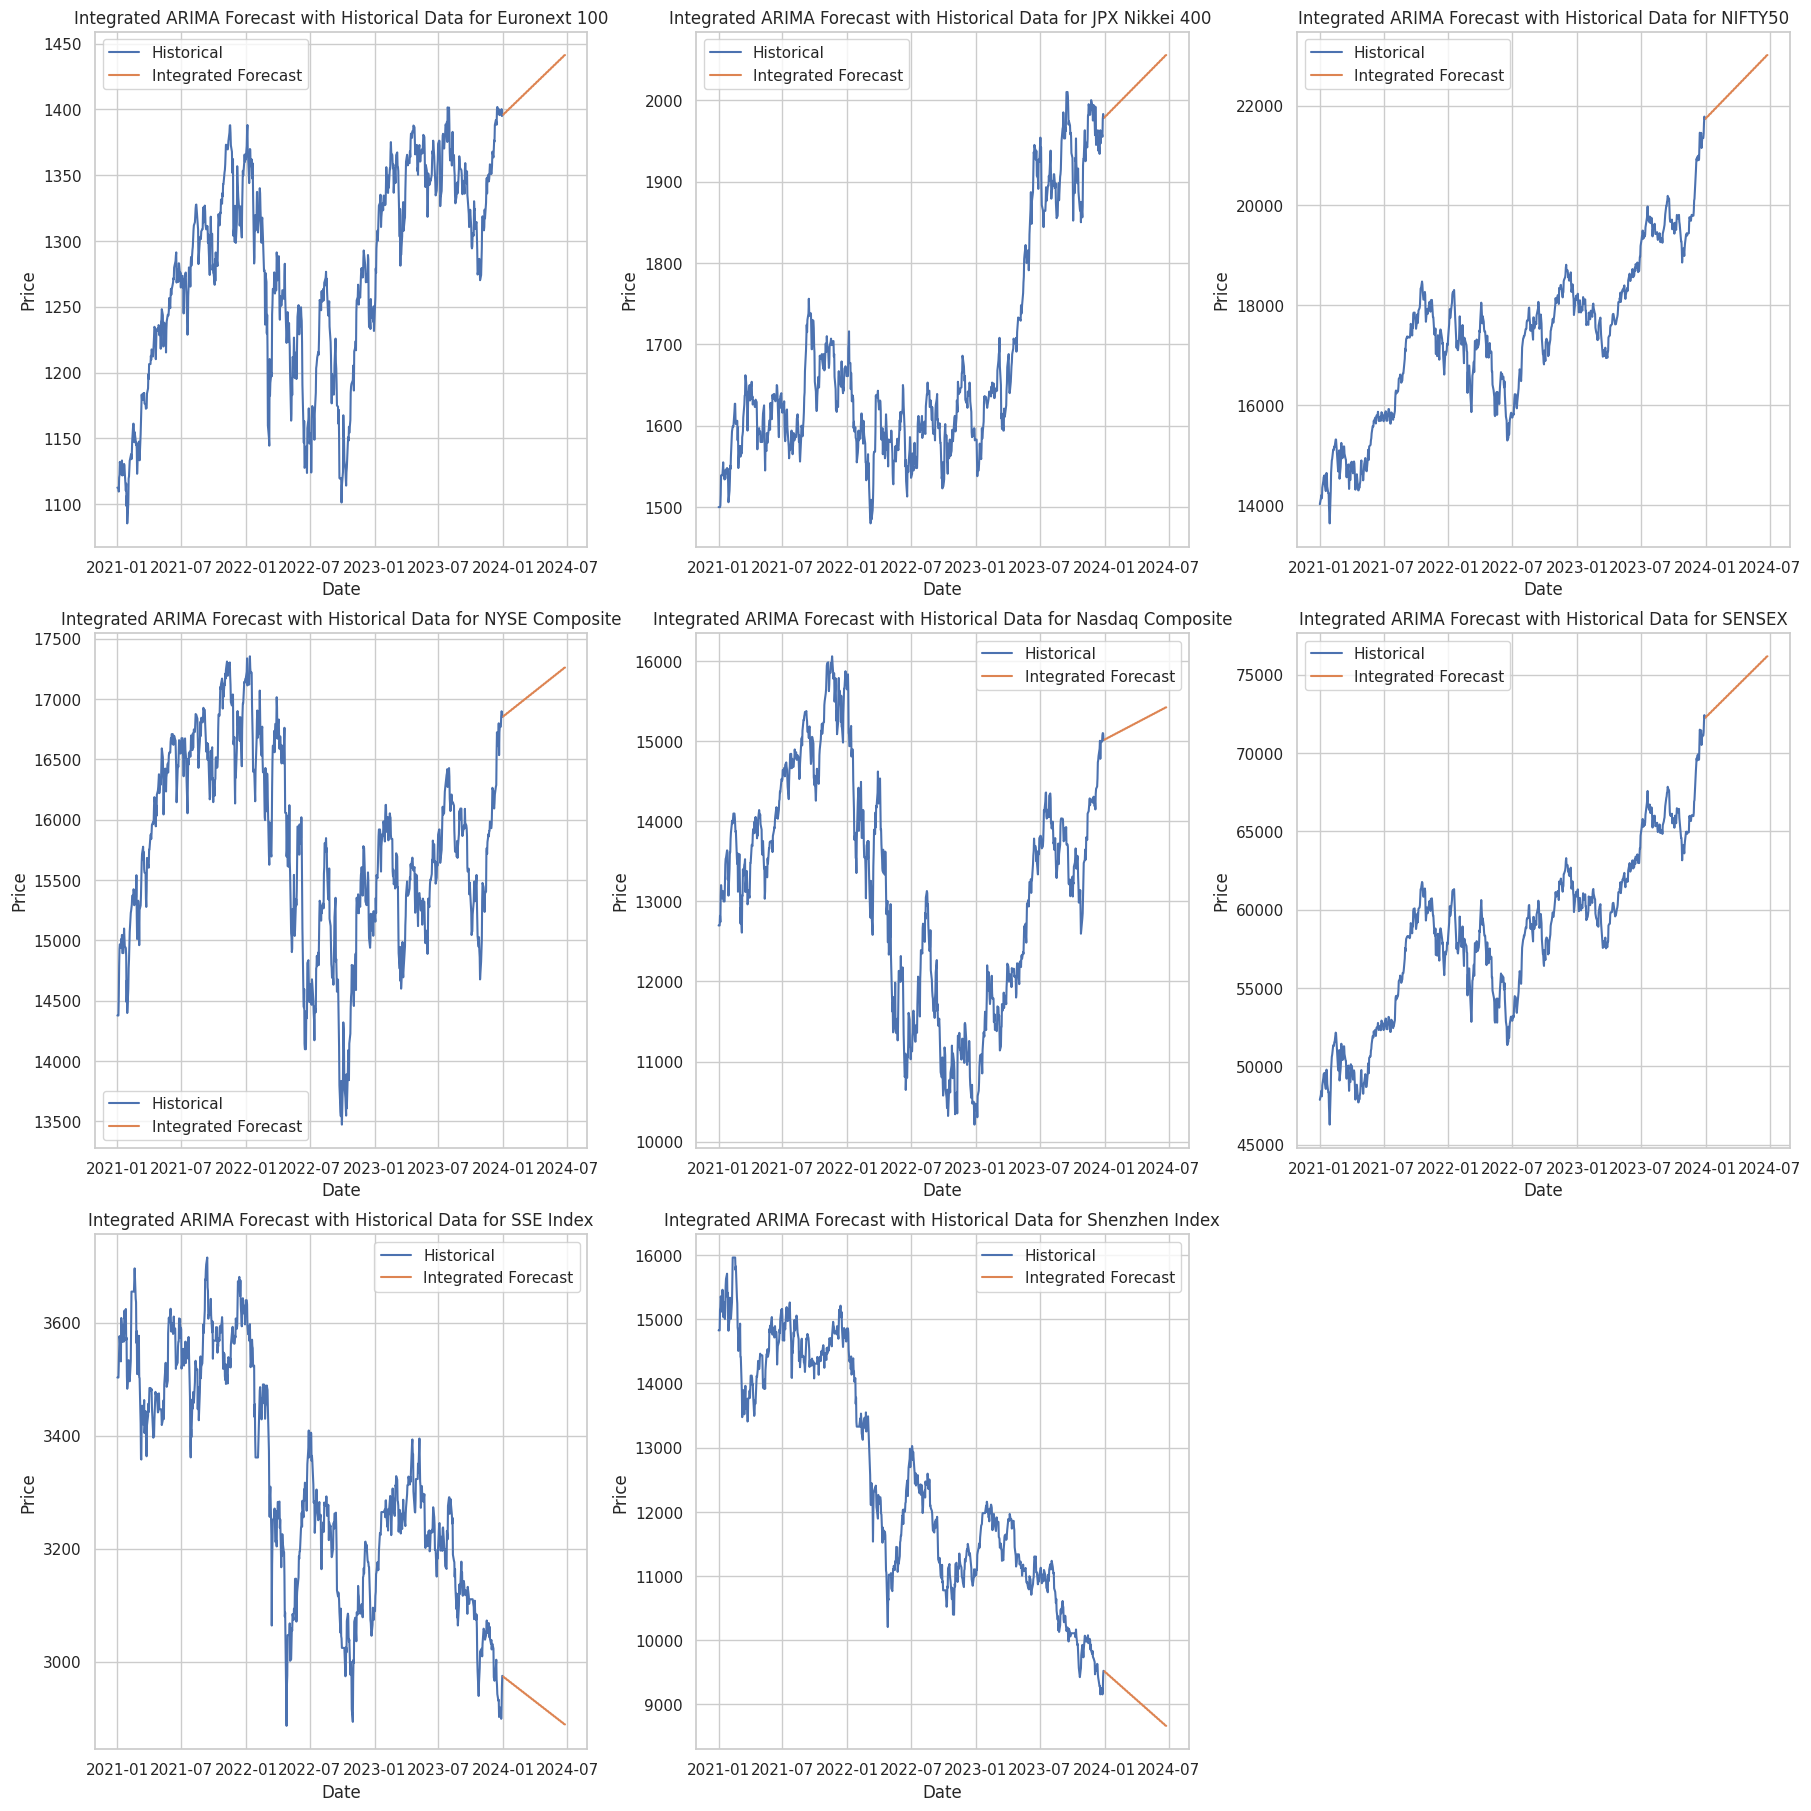

In [66]:
num_levels = len(integrated_forecast_results)
num_rows = math.ceil(num_levels / 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, level in enumerate(integrated_forecast_results.keys()):
    ax = axes[i]
    ax.plot(data.index, data[('Close', level)], label='Historical')
    ax.plot(integrated_forecast_results[level].index, integrated_forecast_results[level], label='Integrated Forecast')
    ax.set_title(f'Integrated ARIMA Forecast with Historical Data for {level}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

The image shows multiple subplots that display **Integrated ARIMA Forecasts with Historical Data** for various stock indices. Here's a detailed explanation of what each subplot represents:

***Key Aspects of the Plot***:

1. **Historical Data and Forecasts**:
   - **Blue Line**: This line represents the historical data for each index. It shows the actual recorded prices over time.
   - **Orange Line**: This represents the integrated ARIMA model's forecast into the future based on the historical data. The forecast line projects forward from the most recent data point, indicating where the ARIMA model predicts the index will move next.

2. **Subplots for Different Indices**:
   Each subplot is labeled to indicate which index it refers to.

3. **X-Axis (Date)**: The x-axis represents the time period. The historical data spans from 2021-01-01 to around 2024, and the forecast extends a bit beyond the most recent historical data point.

4. **Y-Axis (Price)**: The y-axis shows the price values for each index.

***Interpretation of the Subplots***:

1. **Overall Historical Trends**:
   - Most indices show varying levels of volatility with upward or downward trends, reflecting the natural fluctuations of stock markets over the time period.

2. **Forecast Projections**:
   - **Upward Projections**: Several indices, including **^NYA (NYSE Composite)**, **^IXIC (Nasdaq Composite)**, **^N100 (Euronext 100)**, **1592.T (JPX Nikkei 400)**, **^NSEI (NIFTY50)**, and **^BSESN (SENSEX)**, have forecasts projecting upward from their last recorded price. This suggests that the ARIMA model predicts an increase in the prices of these indices in the near future.
   - **Downward Projection**: The **399001.SZ (Shenzhen Index)** shows a downward forecast, indicating that the ARIMA model predicts a decline in its value based on recent trends.

3. **Trend Continuation**:
   - For most indices, the forecast seems to follow the recent trend. For example, if an index has been rising in recent months, the forecast continues that rise (as seen in **^NSEI** and **^BSESN**). Conversely, if the index has been declining, as in the case of **399001.SZ (Shenzhen Index)**, the forecast predicts continued decline.

4. **Forecast Length**:
   - The forecast is short-term, extending a few months into 2024. This is typical for ARIMA models, which are generally better suited for short-term forecasting rather than long-term projections.

***Summary***:
This plot provides a clear visualization of the historical price movements of various stock indices along with short-term forecasts using an integrated ARIMA model. The forecasts indicate potential future movements based on historical trends:
- **Upward Trends**: Several indices show upward predictions, signaling optimism based on recent performance.
- **Downward Trend**: The Shenzhen Index, on the other hand, shows a downward forecast, indicating potential decline.
- **Stability in Predictions**: The forecasts generally continue the existing trends, which is typical behavior for ARIMA models trained on time series data.

This image contains multiple paired plots for various stock indices. Each index has two plots side-by-side:

1. **Left Plot: Distribution of Closing Prices** (Histogram with KDE)
2. **Right Plot: Rolling Mean and Standard Deviation** (Time Series Plot)

***Left Plots: Distribution of Closing Prices (Histogram + KDE)***

- **Histogram**: Shows the distribution of closing prices for each index, counting how often the prices fell within certain ranges (bins).
- **KDE (Kernel Density Estimate) Curve**: Overlaid on the histogram, this curve provides a smooth estimate of the probability density of the closing prices. It helps to see the overall shape and distribution of the data more clearly.

***Right Plots: Rolling Mean and Standard Deviation***

- **Original**: The original time series data of the closing prices is plotted over time.
- **Rolling Mean**: This red line represents the rolling average of the closing prices over a set window (usually 20 or 50 days). It smooths out short-term fluctuations to reveal longer-term trends.
- **Rolling Standard Deviation (Rolling Std)**: The green line represents the rolling standard deviation over the same window, indicating the volatility of the index over time. Lower values suggest less volatility, while higher values suggest more volatility.

***Index-Specific Interpretations***:

1. **NYSE Composite**:
   - **Distribution**: The distribution of closing prices shows a multi-modal distribution with peaks around 15,500 and 16,500.
   - **Rolling Mean/Std**: The rolling mean closely follows the original prices, indicating a fairly stable upward trend. Volatility (standard deviation) remains low throughout.

2. **Nasdaq Composite**:
   - **Distribution**: The histogram shows a somewhat normal distribution with a peak around 14,000.
   - **Rolling Mean/Std**: The rolling mean follows the upward trend, with low volatility until some spikes in standard deviation toward the end.

3. **Euronext 100**:
   - **Distribution**: This distribution shows a slight right skew with peaks at around 1,300.
   - **Rolling Mean/Std**: The rolling mean shows an overall upward trend, and the rolling standard deviation is stable with minor fluctuations.

4. **SSE Index - Shanghai Stock Exchange**:
   - **Distribution**: The distribution has two prominent peaks at around 3,200 and 3,500, indicating a bimodal distribution.
   - **Rolling Mean/Std**: The rolling mean has a slight downward trend, while volatility remains relatively stable with small spikes.

5. **JPX Nikkei 400**:
   - **Distribution**: The distribution is slightly skewed with a peak around 1,600.
   - **Rolling Mean/Std**: The rolling mean indicates an upward trend in prices, while the rolling standard deviation remains relatively low and stable.

6. **Shenzhen Index**:
   - **Distribution**: The distribution is multimodal, showing different peaks, with a large one around 13,000 and another around 15,000.
   - **Rolling Mean/Std**: The rolling mean shows a downward trend, and the rolling standard deviation remains low but with minor volatility spikes.

7. **NIFTY50**:
   - **Distribution**: The histogram shows a somewhat normal distribution with a peak around 18,000.
   - **Rolling Mean/Std**: The rolling mean shows an upward trend with low volatility until some moderate spikes in volatility toward the end.

8. **SENSEX**:
   - **Distribution**: The distribution is bell-shaped with a peak around 60,000.
   - **Rolling Mean/Std**: The rolling mean follows a stable upward trend, while volatility (standard deviation) remains low throughout with no significant spikes.

***Summary***:
- **Histograms**: Provide insights into the distribution of historical closing prices for each index, showing whether the prices follow a normal distribution, have skewness, or are multimodal.
- **Rolling Mean and Std**: Offer insights into the trend and volatility of the index over time. A smooth upward trend with low volatility indicates stable growth, while spikes in standard deviation suggest periods of higher volatility.

This combination of visualizations allows you to see both the overall distribution of the index's closing prices and the behavior of the prices over time, including how volatile or stable the prices were.

# Feature Selection

In [67]:
def create_features(df):
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['DayOfWeek'] = df.index.dayofweek
    return df

In [68]:
features = closing_prices.copy()
features = create_features(features)

# Applying Various Machine Learning Models

In [69]:
train_features = features.loc['2021-01-01':'2022-12-31']
validation_features = features.loc['2023-01-01':'2023-12-31']

In [70]:
train_labels = closing_prices.loc['2021-01-01':'2022-12-31']
validation_labels = closing_prices.loc['2023-01-01':'2023-12-31']

## Metrics for Model Evaluation

In [71]:
def calculate_metrics(true_values, predictions):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

## Linear Regression

In [72]:
lr_model = LinearRegression()
lr_model.fit(train_features.drop(columns=data.columns.levels[1]), train_labels)

LinearRegression()

In [73]:
lr_predictions = lr_model.predict(validation_features.drop(columns=data.columns.levels[1]))

In [74]:
lr_mae, lr_mse, lr_rmse = calculate_metrics(validation_labels, lr_predictions)

In [75]:
print(f'Linear Regression MAE: {lr_mae}')
print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression RMSE: {lr_rmse}')

Linear Regression MAE: 1065.393553665697
Linear Regression MSE: 2477216.9472630937
Linear Regression RMSE: 1573.917706636244


## Random Forest Regression

In [76]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(train_features.drop(columns=data.columns.levels[1]), train_labels)

RandomForestRegressor(random_state=0)

In [77]:
rf_predictions = rf_model.predict(validation_features.drop(columns=data.columns.levels[1]))

In [78]:
rf_mae, rf_mse, rf_rmse = calculate_metrics(validation_labels, rf_predictions)

In [79]:
print(f'Random Forest MAE: {rf_mae}')
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest MAE: 1549.1591538678686
Random Forest MSE: 7364333.482967044
Random Forest RMSE: 2713.730547229596


## XGBoost Regression

In [80]:
xgb_model = XGBRegressor(n_estimators=100, random_state=0)
xgb_model.fit(train_features.drop(columns=data.columns.levels[1]), train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [81]:
xgb_predictions = xgb_model.predict(validation_features.drop(columns=data.columns.levels[1]))

In [82]:
xgb_mae, xgb_mse, xgb_rmse = calculate_metrics(validation_labels, xgb_predictions)

In [83]:
print(f'XGBoost MAE: {xgb_mae}')
print(f'XGBoost MSE: {xgb_mse}')
print(f'XGBoost RMSE: {xgb_rmse}')

XGBoost MAE: 1554.3994691702037
XGBoost MSE: 7403224.526917895
XGBoost RMSE: 2720.8867170313974


## Comparig the Model Performances

In [84]:
model_metrics = {
    'Linear Regression': {
        'MAE': lr_mae,
        'MSE': lr_mse,
        'RMSE': lr_rmse
    },
    'Random Forest': {
        'MAE': rf_mae,
        'MSE': rf_mse,
        'RMSE': rf_rmse
    },
    'XGBoost': {
        'MAE': xgb_mae,
        'MSE': xgb_mse,
        'RMSE': xgb_rmse
    }
}

In [85]:
def print_and_select_best_model(metrics):
    best_mae_model = None
    best_mse_model = None
    best_rmse_model = None

    best_mae = float('inf')
    best_mse = float('inf')
    best_rmse = float('inf')

    print("Model Evaluation Metrics:")
    for model_name, metrics_dict in metrics.items():
        print("-"*60)
        print(f"{model_name} Metrics:")
        print(f"  MAE: {metrics_dict['MAE']}")
        print(f"  MSE: {metrics_dict['MSE']}")
        print(f"  RMSE: {metrics_dict['RMSE']}")
        print("-"*60)

        if metrics_dict['MAE'] < best_mae:
            best_mae = metrics_dict['MAE']
            best_mae_model = model_name

        if metrics_dict['MSE'] < best_mse:
            best_mse = metrics_dict['MSE']
            best_mse_model = model_name

        if metrics_dict['RMSE'] < best_rmse:
            best_rmse = metrics_dict['RMSE']
            best_rmse_model = model_name

    print("\n", "-"*60)
    print("-"*60)
    print(f"Best Model based on MAE: {best_mae_model} (MAE: {best_mae})")
    print(f"Best Model based on MSE: {best_mse_model} (MSE: {best_mse})")
    print(f"Best Model based on RMSE: {best_rmse_model} (RMSE: {best_rmse})")

In [86]:
print_and_select_best_model(model_metrics)

Model Evaluation Metrics:
------------------------------------------------------------
Linear Regression Metrics:
  MAE: 1065.393553665697
  MSE: 2477216.9472630937
  RMSE: 1573.917706636244
------------------------------------------------------------
------------------------------------------------------------
Random Forest Metrics:
  MAE: 1549.1591538678686
  MSE: 7364333.482967044
  RMSE: 2713.730547229596
------------------------------------------------------------
------------------------------------------------------------
XGBoost Metrics:
  MAE: 1554.3994691702037
  MSE: 7403224.526917895
  RMSE: 2720.8867170313974
------------------------------------------------------------

 ------------------------------------------------------------
------------------------------------------------------------
Best Model based on MAE: Linear Regression (MAE: 1065.393553665697)
Best Model based on MSE: Linear Regression (MSE: 2477216.9472630937)
Best Model based on RMSE: Linear Regression (RMS

### Plotting the Comparison

In [87]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
maes = [lr_mae, rf_mae, xgb_mae]
mses = [lr_mse, rf_mse, xgb_mse]
rmses = [lr_rmse, rf_rmse, xgb_rmse]

In [88]:
sorted_data = sorted(zip(models, maes, mses, rmses), key=lambda x: x[1], reverse=True)
sorted_models, sorted_maes, sorted_mses, sorted_rmses = zip(*sorted_data)

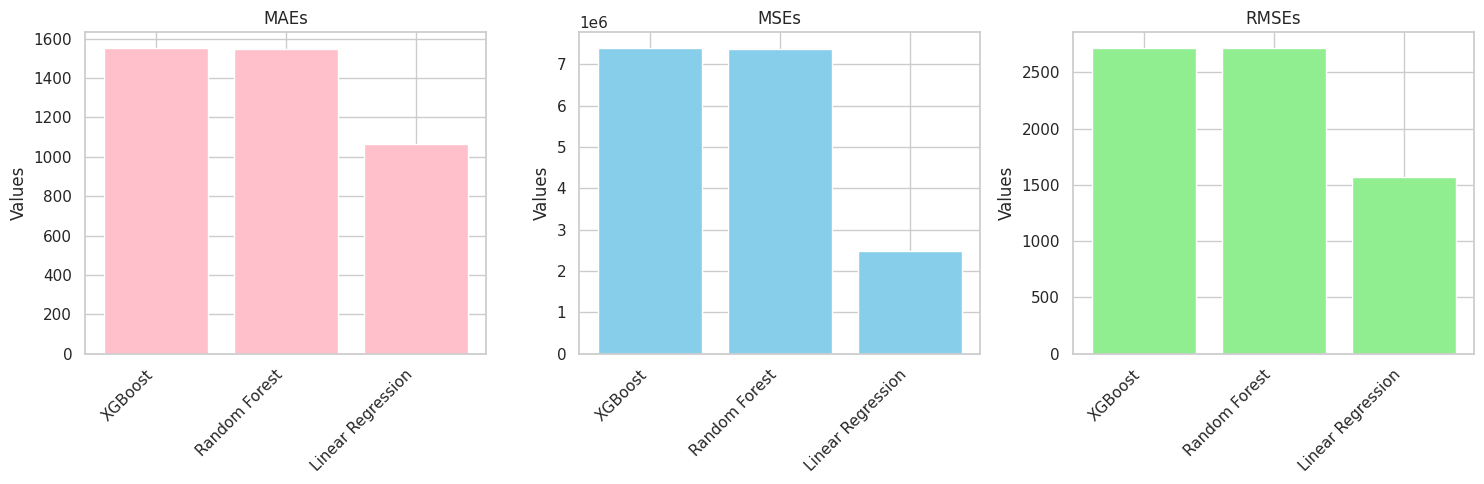

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(sorted_models, sorted_maes, color='pink')
axs[0].set_title("MAEs")
axs[0].set_ylabel("Values")
axs[0].set_xticklabels(sorted_models, rotation=45, ha='right')

axs[1].bar(sorted_models, sorted_mses, color='skyblue')
axs[1].set_title("MSEs")
axs[1].set_ylabel("Values")
axs[1].set_xticklabels(sorted_models, rotation=45, ha='right')

axs[2].bar(sorted_models, sorted_rmses, color='lightgreen')
axs[2].set_title("RMSEs")
axs[2].set_ylabel("Values")
axs[2].set_xticklabels(sorted_models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

The plot displays a comparison of three different models—XGBoost, Random Forest, and Linear Regression—using three evaluation metrics: MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error). Each plot measures a different error metric, which helps to understand the performance of each model on a time series dataset.

***Context of Time Series Analysis***:

1. **Mean Absolute Error (MAE)**: This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. It provides a straightforward measure of how far off the predictions are, on average. In this plot, Linear Regression has the lowest MAE, indicating it makes more accurate predictions on average compared to XGBoost and Random Forest for this time series data.

2. **Mean Squared Error (MSE)**: This metric squares the errors before averaging, which means it gives more weight to larger errors. This is useful for identifying models that make some large mistakes. Again, Linear Regression has a significantly lower MSE compared to XGBoost and Random Forest, suggesting it makes fewer large errors on the time series data.

3. **Root Mean Squared Error (RMSE)**: RMSE is the square root of MSE, translating it back into the original units of the data. It is sensitive to outliers due to the squaring process and provides a measure of the standard deviation of the prediction errors. Here, Linear Regression has the lowest RMSE, followed by Random Forest and then XGBoost, which means Linear Regression's predictions deviate the least from the actual values.

***Summary***:

- **Linear Regression** appears to perform best across all three metrics (MAE, MSE, RMSE), indicating it may be the most suitable model for this specific time series prediction task, especially in scenarios where avoiding large errors is crucial.
- **XGBoost** and **Random Forest** show higher error rates, suggesting they might be less effective or overfitting in this particular time series context compared to Linear Regression. However, these models might still be valuable if tuned properly or if non-linearity in the data is a concern.

The selection of the best model depends on the specific requirements and characteristics of the time series data, such as the need for interpretability, sensitivity to large errors, and computational efficiency.

`***Therefore the best model is the Linear Regresion***`

# Fitting the Best Machine Learning Models

In [90]:
lr_models = {}

for level in data.columns.levels[1]:
    level_train_features = train_features.drop(columns=data.columns.levels[1], errors='ignore')
    level_train_labels = train_labels[level]

    lr_model = LinearRegression()
    lr_model.fit(level_train_features, level_train_labels)

    lr_models[level] = lr_model

## Forecasting

In [91]:
def create_forecast_features(start_date, end_date):
    forecast_dates = pd.date_range(start=start_date, end=end_date)
    forecast_features = pd.DataFrame(index=forecast_dates)
    forecast_features = create_features(forecast_features)

    return forecast_features

In [92]:
forecast_features_2024 = create_forecast_features('2024-01-01', '2024-07-31')

In [93]:
forecast_features_2024_flat = forecast_features_2024[train_features.drop(columns=data.columns.levels[1], errors='ignore').columns]

In [94]:
forecast_results_2024 = pd.DataFrame(index=forecast_features_2024.index)
forecast_results_2024.head()

Empty DataFrame
Columns: []
Index: [2024-01-01 00:00:00, 2024-01-02 00:00:00, 2024-01-03 00:00:00, 2024-01-04 00:00:00, 2024-01-05 00:00:00]

In [95]:
for level in data.columns.levels[1]:
    forecast_features_for_level = forecast_features_2024_flat.copy()

    forecast_results_2024[level] = lr_models[level].predict(forecast_features_for_level)

In [96]:
forecast_results_2024 = forecast_results_2024.stack().reset_index()
forecast_results_2024.columns = ['Date', 'Indices', 'Forecast']

In [97]:
forecast_results_2024.head()

Date           Indices      Forecast
0 2024-01-01      Euronext 100   1149.219088
1 2024-01-01   JPX Nikkei 400    1499.619137
2 2024-01-01           NIFTY50  18562.758760
3 2024-01-01    NYSE Composite  13925.712720
4 2024-01-01  Nasdaq Composite   8275.504799

### Saving the Forecasted Results

In [98]:
forecast_results_2024.to_csv('linear_regression_forecast_2024_with_indices.csv', index=False)
print("Forecast for 2024 with tickers has been saved to 'linear_regression_forecast_2024_with_indices.csv'.")

Forecast for 2024 with tickers has been saved to 'linear_regression_forecast_2024_with_indices.csv'.


# Importing the Test Datset

In [99]:
tickers = ['^NYA', '^IXIC', '^N100', '000001.SS', '1592.T', '399001.SZ', '^NSEI', '^BSESN']
start_date = '2024-01-01'
end_date = '2024-08-28'

In [100]:
actual_data = yf.download(tickers, start=start_date, end=end_date)['Close']
actual_data.head()

[*********************100%***********************]  8 of 8 completed


Ticker                       000001.SS  1592.T    399001.SZ        ^BSESN  \
Date                                                                        
2024-01-01 00:00:00+00:00          NaN     NaN          NaN           NaN   
2024-01-02 00:00:00+00:00  2962.275879     NaN  9401.349609  71892.476562   
2024-01-03 00:00:00+00:00  2967.247070     NaN  9330.860352  71356.601562   
2024-01-04 00:00:00+00:00  2954.349121  1969.0  9215.250000  71847.570312   
2024-01-05 00:00:00+00:00  2929.179932  1980.0  9116.440430  72026.148438   

Ticker                            ^IXIC        ^N100         ^NSEI  \
Date                                                                 
2024-01-01 00:00:00+00:00           NaN          NaN  21741.900391   
2024-01-02 00:00:00+00:00  14765.940430  1395.109985  21665.800781   
2024-01-03 00:00:00+00:00  14592.209961  1380.979980  21517.349609   
2024-01-04 00:00:00+00:00  14510.299805  1389.780029  21658.599609   
2024-01-05 00:00:00+00:00  14524.070312  1387.650024  21710.800781   

Ticker                             ^NYA  
Date                                     
2024-01-01 00:00:00+00:00           NaN  
2024-01-02 00:00:00+00:00  16841.619141  
2024-01-03 00:00:00+00:00  16718.650391  
2024-01-04 00:00:00+00:00  16715.710938  
2024-01-05 00:00:00+00:00  16758.240234

In [101]:
actual_data.columns

Index(['000001.SS', '1592.T', '399001.SZ', '^BSESN', '^IXIC', '^N100', '^NSEI',
       '^NYA'],
      dtype='object', name='Ticker')

In [102]:
new_column_names = {
    '^NYA': 'NYSE Composite',
    '^IXIC': 'Nasdaq Composite',
    '^N100': 'Euronext 100',
    '000001.SS': 'SSE Index',
    '1592.T': 'JPX Nikkei 400 ',
    '399001.SZ': 'Shenzhen Index',
    '^NSEI': 'NIFTY50',
    '^BSESN': 'SENSEX'
}

actual_data.rename(columns=new_column_names, inplace=True)

In [103]:
actual_data.head()

Ticker                       SSE Index  JPX Nikkei 400   Shenzhen Index  \
Date                                                                      
2024-01-01 00:00:00+00:00          NaN              NaN             NaN   
2024-01-02 00:00:00+00:00  2962.275879              NaN     9401.349609   
2024-01-03 00:00:00+00:00  2967.247070              NaN     9330.860352   
2024-01-04 00:00:00+00:00  2954.349121           1969.0     9215.250000   
2024-01-05 00:00:00+00:00  2929.179932           1980.0     9116.440430   

Ticker                           SENSEX  Nasdaq Composite  Euronext 100  \
Date                                                                      
2024-01-01 00:00:00+00:00           NaN               NaN           NaN   
2024-01-02 00:00:00+00:00  71892.476562      14765.940430   1395.109985   
2024-01-03 00:00:00+00:00  71356.601562      14592.209961   1380.979980   
2024-01-04 00:00:00+00:00  71847.570312      14510.299805   1389.780029   
2024-01-05 00:00:00+00:00  72026.148438      14524.070312   1387.650024   

Ticker                          NIFTY50  NYSE Composite  
Date                                                     
2024-01-01 00:00:00+00:00  21741.900391             NaN  
2024-01-02 00:00:00+00:00  21665.800781    16841.619141  
2024-01-03 00:00:00+00:00  21517.349609    16718.650391  
2024-01-04 00:00:00+00:00  21658.599609    16715.710938  
2024-01-05 00:00:00+00:00  21710.800781    16758.240234

In [104]:
actual_data.index = actual_data.index.astype(str).str.replace('00:00:00+00:00', '')
actual_data.head()

Ticker         SSE Index  JPX Nikkei 400   Shenzhen Index        SENSEX  \
Date                                                                      
2024-01-01           NaN              NaN             NaN           NaN   
2024-01-02   2962.275879              NaN     9401.349609  71892.476562   
2024-01-03   2967.247070              NaN     9330.860352  71356.601562   
2024-01-04   2954.349121           1969.0     9215.250000  71847.570312   
2024-01-05   2929.179932           1980.0     9116.440430  72026.148438   

Ticker       Nasdaq Composite  Euronext 100       NIFTY50  NYSE Composite  
Date                                                                       
2024-01-01                NaN           NaN  21741.900391             NaN  
2024-01-02       14765.940430   1395.109985  21665.800781    16841.619141  
2024-01-03       14592.209961   1380.979980  21517.349609    16718.650391  
2024-01-04       14510.299805   1389.780029  21658.599609    16715.710938  
2024-01-05       14524.070312   1387.650024  21710.800781    16758.240234

In [105]:
actual_data.to_csv('actual_stock_data_2024.csv')

In [106]:
actual_data = pd.read_csv('/content/actual_stock_data_2024.csv', index_col=0, parse_dates=True)
actual_data.head()

SSE Index  JPX Nikkei 400   Shenzhen Index        SENSEX  \
Date                                                                     
2024-01-01          NaN              NaN             NaN           NaN   
2024-01-02  2962.275879              NaN     9401.349609  71892.476562   
2024-01-03  2967.247070              NaN     9330.860352  71356.601562   
2024-01-04  2954.349121           1969.0     9215.250000  71847.570312   
2024-01-05  2929.179932           1980.0     9116.440430  72026.148438   

            Nasdaq Composite  Euronext 100       NIFTY50  NYSE Composite  
Date                                                                      
2024-01-01               NaN           NaN  21741.900391             NaN  
2024-01-02      14765.940430   1395.109985  21665.800781    16841.619141  
2024-01-03      14592.209961   1380.979980  21517.349609    16718.650391  
2024-01-04      14510.299805   1389.780029  21658.599609    16715.710938  
2024-01-05      14524.070312   1387.650024  21710.800781    16758.240234

## Treating the Null Values

In [107]:
actual_data.isnull().sum().sort_values(ascending=False)

SSE Index           13
Shenzhen Index      13
SENSEX              13
JPX Nikkei 400      12
NIFTY50             12
Nasdaq Composite     7
NYSE Composite       7
Euronext 100         4
dtype: int64

In [108]:
actual_data = actual_data.ffill()
actual_data.isnull().sum().sort_values(ascending=False)

JPX Nikkei 400      3
SSE Index           1
Shenzhen Index      1
SENSEX              1
Nasdaq Composite    1
Euronext 100        1
NYSE Composite      1
NIFTY50             0
dtype: int64

In [109]:
actual_data = actual_data.bfill()
actual_data.isnull().sum().sort_values(ascending=False)

SSE Index           0
JPX Nikkei 400      0
Shenzhen Index      0
SENSEX              0
Nasdaq Composite    0
Euronext 100        0
NIFTY50             0
NYSE Composite      0
dtype: int64

In [110]:
print("Actual data date range:", actual_data.index.min(), "to", actual_data.index.max())
print("Actual data length:", len(actual_data))

Actual data date range: 2024-01-01 00:00:00 to 2024-08-27 00:00:00
Actual data length: 172


In [111]:
actual_start_date = actual_data.index.min()
actual_end_date = actual_data.index.max()
actual_start_date, actual_end_date

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-08-27 00:00:00'))

## Saving ARIMA Forecast Results

In [112]:
arima_forecast = pd.read_csv('/content/integrated_forecast_2024.csv', index_col=0, parse_dates=True)

In [113]:
arima_forecast.index = pd.date_range(start=actual_start_date, periods=arima_forecast.shape[0], freq='B')
arima_forecast = arima_forecast.loc[actual_start_date:actual_end_date]
arima_forecast.columns = data.columns.levels[1]
arima_forecast.head()

Ticker      Euronext 100  JPX Nikkei 400        NIFTY50  NYSE Composite  \
2024-01-01   1395.876439      1978.557411  21737.950156    16854.734856   
2024-01-02   1396.239416      1979.171484  21747.905518    16857.931613   
2024-01-03   1396.602235      1979.786134  21758.076264    16861.174642   
2024-01-04   1396.965058      1980.400791  21768.260631    16864.419254   
2024-01-05   1397.327881      1981.015448  21778.445859    16867.663920   

Ticker      Nasdaq Composite        SENSEX    SSE Index  Shenzhen Index  
2024-01-01      15016.114692  72258.537937  2973.714826     9518.089934  
2024-01-02      15019.320892  72288.942645  2973.050779     9511.285702  
2024-01-03      15022.554534  72320.127615  2972.372312     9504.481010  
2024-01-04      15025.787693  72351.362797  2971.694218     9497.676317  
2024-01-05      15029.020861  72382.601212  2971.016115     9490.871624

## Saving Linear Regression Results

In [114]:
lr_forecast_raw = pd.read_csv('/content/linear_regression_forecast_2024_with_indices.csv')

In [115]:
lr_forecast = lr_forecast_raw.pivot(index='Date', columns='Indices', values='Forecast')
lr_forecast.index = pd.to_datetime(lr_forecast.index)
lr_forecast = lr_forecast.loc[actual_start_date.tz_localize(None):actual_end_date.tz_localize(None)]

In [116]:
lr_forecast.head()

Indices     Euronext 100  JPX Nikkei 400        NIFTY50  NYSE Composite  \
Date                                                                      
2024-01-01   1149.219088      1499.619137  18562.758760     13925.71272   
2024-01-02   1149.477197      1499.316207  18559.531957     13924.90427   
2024-01-03   1149.735307      1499.013277  18556.305154     13924.09582   
2024-01-04   1149.993417      1498.710347  18553.078351     13923.28737   
2024-01-05   1150.251526      1498.407417  18549.851548     13922.47892   

Indices     Nasdaq Composite        SENSEX    SSE Index  Shenzhen Index  
Date                                                                     
2024-01-01       8275.504799  62209.916383  2672.865083     7453.691402  
2024-01-02       8265.403567  62199.153878  2671.532600     7440.384708  
2024-01-03       8255.302335  62188.391373  2670.200117     7427.078014  
2024-01-04       8245.201103  62177.628868  2668.867634     7413.771320  
2024-01-05       8235.099871  62166.866363  2667.535151     7400.464626

# Camparison between ARIMA and Linear Regression

## Comparing the Results

In [117]:
actual_data.index = pd.to_datetime(actual_data.index)
arima_forecast.index = pd.to_datetime(arima_forecast.index)
lr_forecast.index = pd.to_datetime(lr_forecast.index)

In [118]:
print("Actual data date range:", actual_data.index.min(), "to", actual_data.index.max())
print("ARIMA forecast date range:", arima_forecast.index.min(), "to", arima_forecast.index.max())
print("Linear Regression forecast date range:", lr_forecast.index.min(), "to", lr_forecast.index.max())

Actual data date range: 2024-01-01 00:00:00 to 2024-08-27 00:00:00
ARIMA forecast date range: 2024-01-01 00:00:00 to 2024-06-24 00:00:00
Linear Regression forecast date range: 2024-01-01 00:00:00 to 2024-07-31 00:00:00


In [119]:
print("Actual data columns:", actual_data.columns)
print("ARIMA forecast columns:", arima_forecast.columns)
print("Linear Regression forecast columns:", lr_forecast.columns)

Actual data columns: Index(['SSE Index', 'JPX Nikkei 400 ', 'Shenzhen Index', 'SENSEX',
       'Nasdaq Composite', 'Euronext 100', 'NIFTY50', 'NYSE Composite'],
      dtype='object')
ARIMA forecast columns: Index(['Euronext 100', 'JPX Nikkei 400 ', 'NIFTY50', 'NYSE Composite',
       'Nasdaq Composite', 'SENSEX', 'SSE Index', 'Shenzhen Index'],
      dtype='object', name='Ticker')
Linear Regression forecast columns: Index(['Euronext 100', 'JPX Nikkei 400 ', 'NIFTY50', 'NYSE Composite',
       'Nasdaq Composite', 'SENSEX', 'SSE Index', 'Shenzhen Index'],
      dtype='object', name='Indices')


In [120]:
common_dates = actual_data.index.intersection(arima_forecast.index).intersection(lr_forecast.index)

In [121]:
actual_data = actual_data.loc[common_dates]
arima_forecast = arima_forecast.loc[common_dates]
lr_forecast = lr_forecast.loc[common_dates]

In [122]:
print("Filtered actual_data shape:", actual_data.shape)
print("Filtered arima_forecast shape:", arima_forecast.shape)
print("Filtered lr_forecast shape:", lr_forecast.shape)

Filtered actual_data shape: (126, 8)
Filtered arima_forecast shape: (126, 8)
Filtered lr_forecast shape: (126, 8)


In [123]:
comparison_df = actual_data.copy()

In [124]:
for level in actual_data.columns:
    if level in arima_forecast.columns and level in lr_forecast.columns:
        comparison_df[f'ARIMA_{level}'] = arima_forecast[level]
        comparison_df[f'LR_{level}'] = lr_forecast[level]
    else:
        print(f"Ticker {level} is missing in forecast data.")

In [125]:
comparison_df.head()

SSE Index  JPX Nikkei 400   Shenzhen Index        SENSEX  \
2024-01-01  2962.275879           1969.0     9401.349609  71892.476562   
2024-01-02  2962.275879           1969.0     9401.349609  71892.476562   
2024-01-03  2967.247070           1969.0     9330.860352  71356.601562   
2024-01-04  2954.349121           1969.0     9215.250000  71847.570312   
2024-01-05  2929.179932           1980.0     9116.440430  72026.148438   

            Nasdaq Composite  Euronext 100       NIFTY50  NYSE Composite  \
2024-01-01      14765.940430   1395.109985  21741.900391    16841.619141   
2024-01-02      14765.940430   1395.109985  21665.800781    16841.619141   
2024-01-03      14592.209961   1380.979980  21517.349609    16718.650391   
2024-01-04      14510.299805   1389.780029  21658.599609    16715.710938   
2024-01-05      14524.070312   1387.650024  21710.800781    16758.240234   

            ARIMA_SSE Index  LR_SSE Index  ...  ARIMA_SENSEX     LR_SENSEX  \
2024-01-01      2973.714826   2672.865083  ...  72258.537937  62209.916383   
2024-01-02      2973.050779   2671.532600  ...  72288.942645  62199.153878   
2024-01-03      2972.372312   2670.200117  ...  72320.127615  62188.391373   
2024-01-04      2971.694218   2668.867634  ...  72351.362797  62177.628868   
2024-01-05      2971.016115   2667.535151  ...  72382.601212  62166.866363   

            ARIMA_Nasdaq Composite  LR_Nasdaq Composite  ARIMA_Euronext 100  \
2024-01-01            15016.114692          8275.504799         1395.876439   
2024-01-02            15019.320892          8265.403567         1396.239416   
2024-01-03            15022.554534          8255.302335         1396.602235   
2024-01-04            15025.787693          8245.201103         1396.965058   
2024-01-05            15029.020861          8235.099871         1397.327881   

            LR_Euronext 100  ARIMA_NIFTY50    LR_NIFTY50  \
2024-01-01      1149.219088   21737.950156  18562.758760   
2024-01-02      1149.477197   21747.905518  18559.531957   
2024-01-03      1149.735307   21758.076264  18556.305154   
2024-01-04      1149.993417   21768.260631  18553.078351   
2024-01-05      1150.251526   21778.445859  18549.851548   

            ARIMA_NYSE Composite  LR_NYSE Composite  
2024-01-01          16854.734856        13925.71272  
2024-01-02          16857.931613        13924.90427  
2024-01-03          16861.174642        13924.09582  
2024-01-04          16864.419254        13923.28737  
2024-01-05          16867.663920        13922.47892  

[5 rows x 24 columns]

In [126]:
comparison_df = comparison_df.dropna(subset = [col for col in comparison_df.columns if col.startswith('ARIMA_') or col.startswith('LR_')],
                                     how = 'all')

In [127]:
print("Comparison DataFrame shape after dropping NaNs:", comparison_df.shape)

Comparison DataFrame shape after dropping NaNs: (126, 24)


## Comparison between the Forecasts

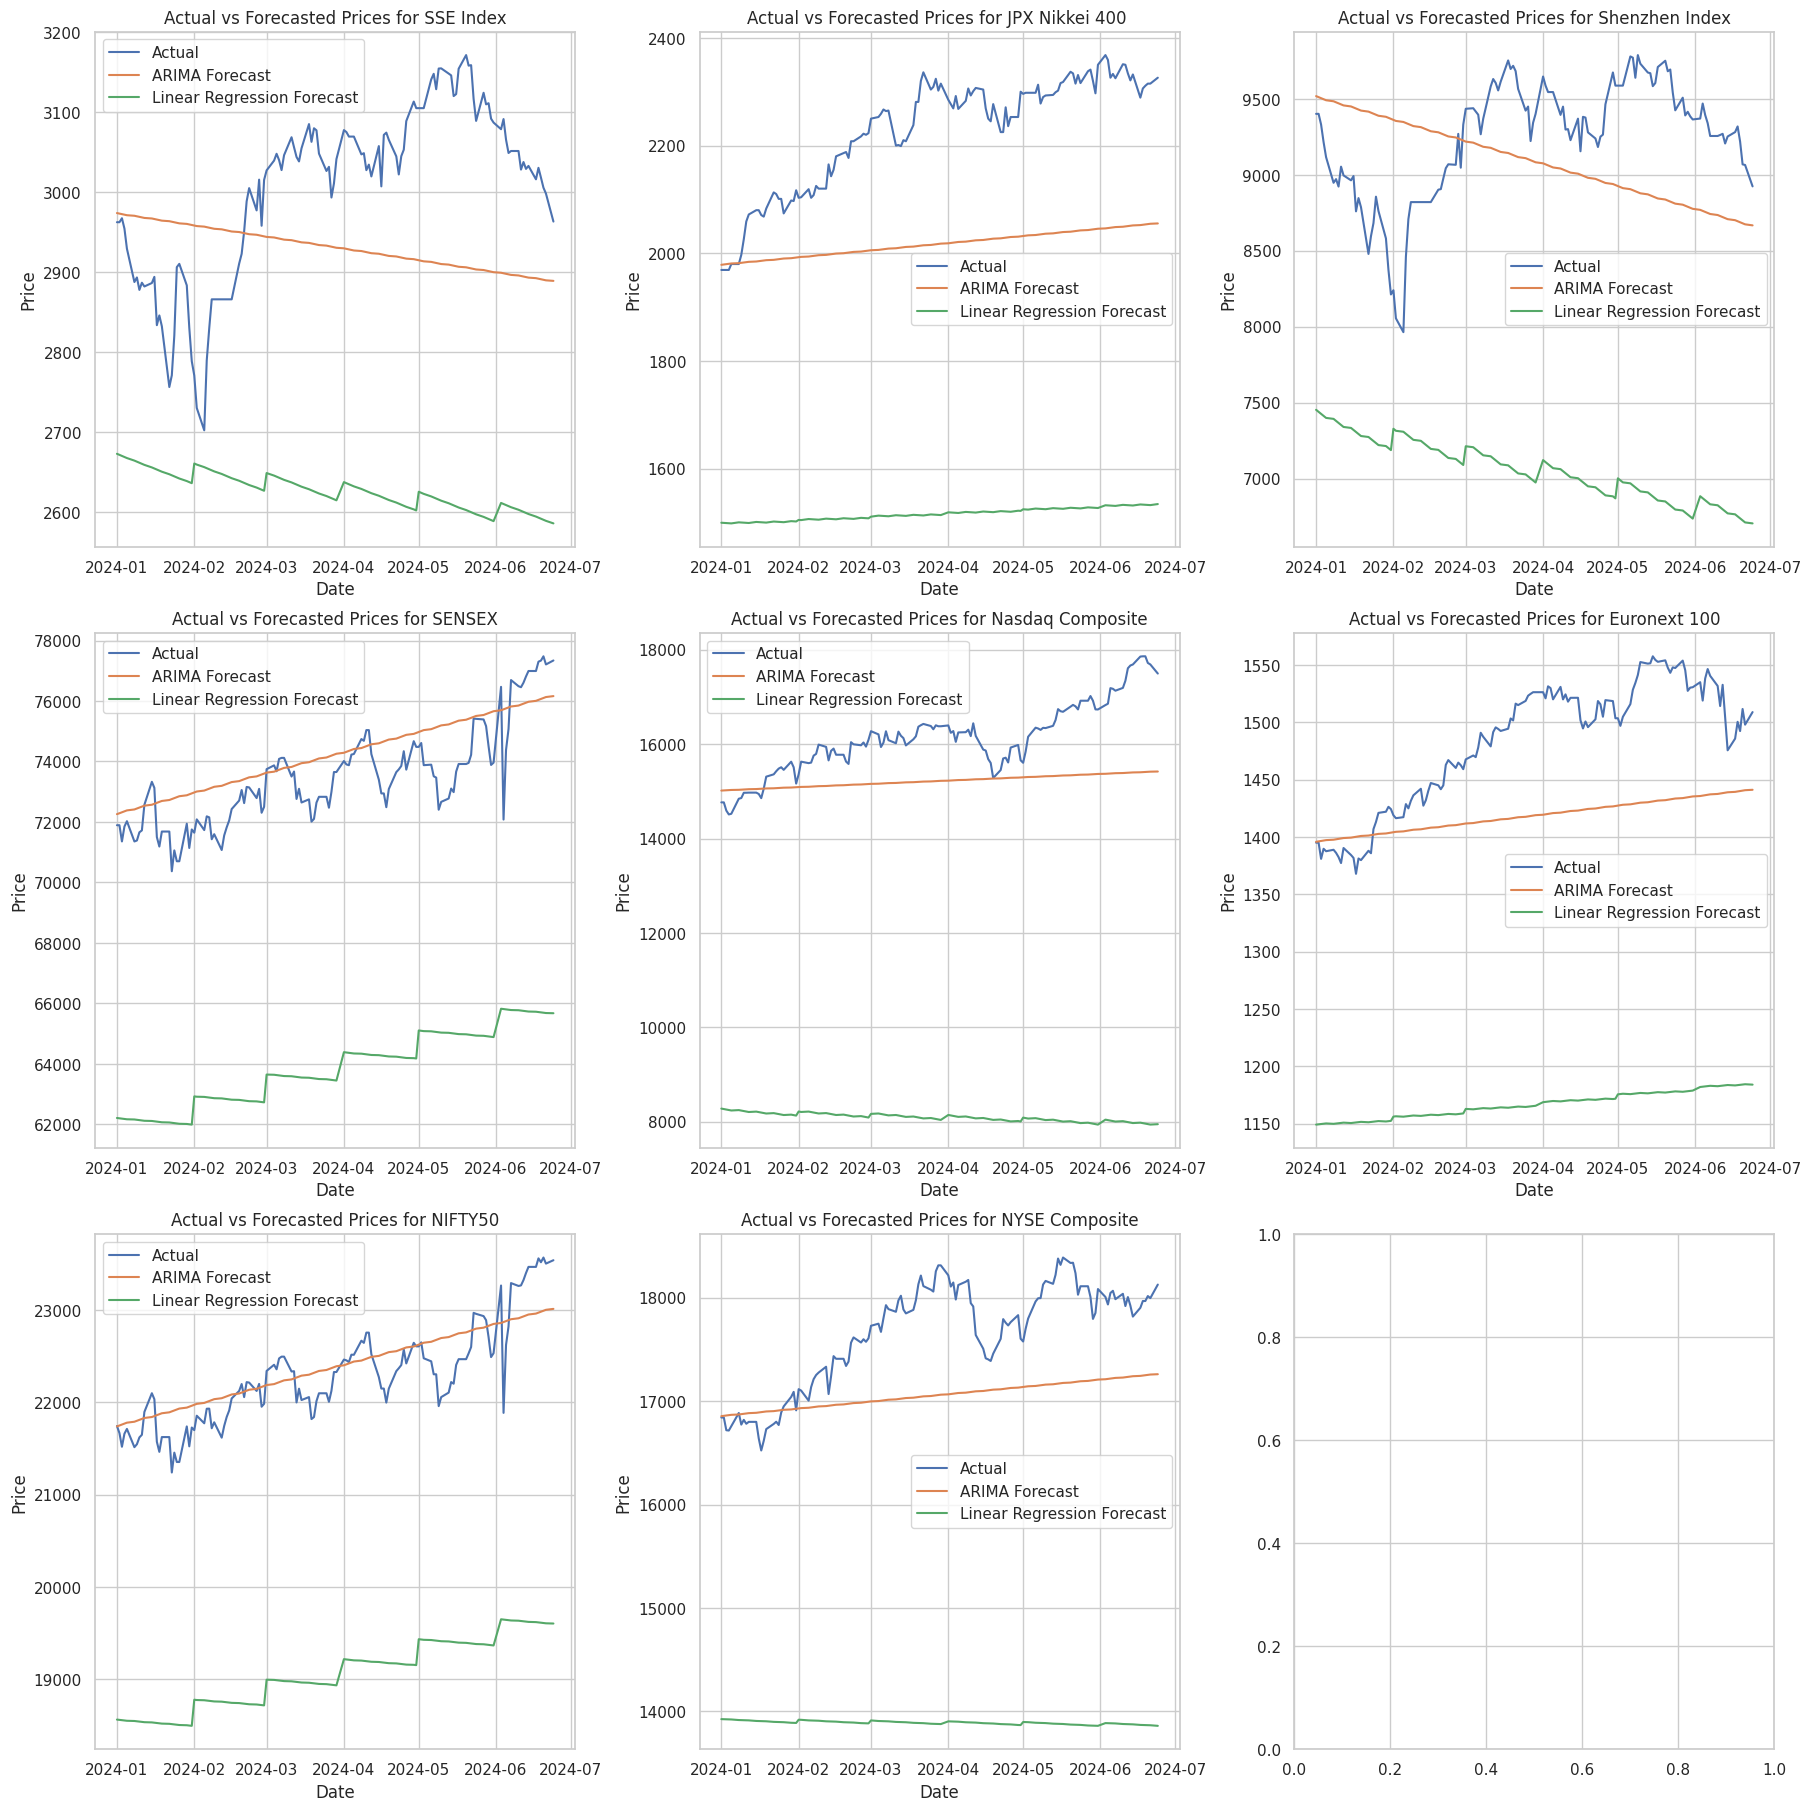

In [128]:
num_levels = len(comparison_df.columns)
num_rows = math.ceil(num_levels / 9)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, level in enumerate(comparison_df.columns):
    if not level.startswith('ARIMA_') and not level.startswith('LR_'):
        ax = axes[i]
        ax.plot(comparison_df.index, comparison_df[level], label='Actual')
        ax.plot(comparison_df.index, comparison_df[f'ARIMA_{level}'], label='ARIMA Forecast')
        ax.plot(comparison_df.index, comparison_df[f'LR_{level}'], label='Linear Regression Forecast')
        ax.set_title(f'Actual vs Forecasted Prices for {level}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

The plot illustrates actual versus forecasted prices for various financial indices using two forecasting models: ARIMA and Linear Regression. Each subplot corresponds to a different financial index, displaying actual price trends alongside the predictions from the ARIMA and Linear Regression models. Here’s a detailed explanation in the context of time series analysis:

***Overview of Subplots***

1. **Indices Covered**: The subplots include forecasts for several global stock indices: SSE Index (Shanghai Stock Exchange), JPX Nikkei 400, Shenzhen Index, SENSEX (India), Nasdaq Composite, Euronext 100, NIFTY50 (India), and NYSE Composite. Each subplot is titled accordingly, indicating which index is being analyzed.

2. **Actual vs. Forecast**:
   - The **blue line** represents the actual observed prices of the respective indices over time.
   - The **orange line** shows the forecasted prices using the ARIMA (AutoRegressive Integrated Moving Average) model, a commonly used method for time series forecasting that captures autocorrelations within the data.
   - The **green line** represents the forecasted prices using a Linear Regression model, which typically assumes a linear relationship between the time index and the prices.

***Analysis of Forecasting Performance***

1. **ARIMA Model**:
   - For indices like **SENSEX**, **NIFTY50**, and **Nasdaq Composite**, the ARIMA forecast closely follows the upward trend of the actual data, suggesting that the ARIMA model effectively captures the trend and seasonality present in these indices.
   - For other indices such as the **SSE Index** and **Shenzhen Index**, the ARIMA model forecasts a downward trend, which diverges from the actual data's pattern. This indicates potential overfitting or that the ARIMA model's assumptions may not align well with these indices' dynamics.

2. **Linear Regression Model**:
   - The Linear Regression forecast line (green) is relatively flat for most indices. This indicates that Linear Regression is not capturing the trend and seasonality present in the actual data effectively. Linear Regression’s simplicity, assuming a direct linear relationship, often fails in the presence of complex patterns, as seen in these time series.
   - The flat forecasts suggest that Linear Regression might not be suitable for time series forecasting in these contexts, where non-linear trends and seasonality are critical.

***Conclusion***

- **ARIMA** appears to be a more appropriate model for forecasting the time series of stock indices compared to Linear Regression, as it is designed to handle time-dependent structures and can model trends and seasonality effectively.
- **Linear Regression** fails to capture the nuances of the time series, leading to forecasts that do not align with the actual data trends. This result underscores the importance of choosing the right model based on the data's inherent characteristics, especially in financial time series with complex patterns.

In time series analysis, selecting a model that aligns with the data's properties (like trend and seasonality) is crucial. These plots highlight the limitations of simpler models like Linear Regression in complex, real-world financial forecasting scenarios and the relative advantages of specialized models like ARIMA.

## Determining the Best Model

In [129]:
if comparison_df.empty:
    print("No data left for comparison after dropping NaN values.")
else:
    results = []
    for ticker in actual_data.columns:
        if f'ARIMA_{ticker}' in comparison_df.columns and f'LR_{ticker}' in comparison_df.columns:
            actual = comparison_df[ticker]
            arima_pred = comparison_df[f'ARIMA_{ticker}']
            lr_pred = comparison_df[f'LR_{ticker}']

            if actual.empty or arima_pred.empty or lr_pred.empty:
                print(f"No data left for {ticker} after dropping NaNs.")
                continue

            arima_mae = mean_absolute_error(actual, arima_pred)
            arima_mse = mean_squared_error(actual, arima_pred)
            arima_rmse = arima_mse ** 0.5

            lr_mae = mean_absolute_error(actual, lr_pred)
            lr_mse = mean_squared_error(actual, lr_pred)
            lr_rmse = lr_mse ** 0.5

            winner = 'ARIMA' if arima_mae < lr_mae else 'Linear Regression'

            results.append({
                'Indices': ticker,
                'ARIMA_MAE': arima_mae,
                'ARIMA_MSE': arima_mse,
                'ARIMA_RMSE': arima_rmse,
                'LR_MAE': lr_mae,
                'LR_MSE': lr_mse,
                'LR_RMSE': lr_rmse,
                'Winner': winner
            })

    results_df = pd.DataFrame(results)
    print(results_df)

            Indices    ARIMA_MAE     ARIMA_MSE   ARIMA_RMSE       LR_MAE  \
0         SSE Index   131.366420  2.109284e+04   145.233746   376.915644   
1   JPX Nikkei 400    210.599537  5.132967e+04   226.560511   711.143075   
2    Shenzhen Index   519.024090  3.329411e+05   577.010473  2180.285431   
3            SENSEX  1044.635033  1.528863e+06  1236.471955  9597.722358   
4  Nasdaq Composite   938.612737  1.225545e+06  1107.043213  8018.871824   
5      Euronext 100    67.347135  5.903147e+03    76.831940   315.642187   
6           NIFTY50   258.772429  9.957386e+04   315.553261  3227.595282   
7    NYSE Composite   625.966523  5.176318e+05   719.466364  3754.726098   

         LR_MSE      LR_RMSE Winner  
0  1.570362e+05   396.277941  ARIMA  
1  5.148039e+05   717.498372  ARIMA  
2  5.013441e+06  2239.071491  ARIMA  
3  9.300688e+07  9644.007277  ARIMA  
4  6.498399e+07  8061.264647  ARIMA  
5  1.016520e+05   318.829098  ARIMA  
6  1.050915e+07  3241.781725  ARIMA  
7  1.436091

In [130]:
results_df.head()

Indices    ARIMA_MAE     ARIMA_MSE   ARIMA_RMSE       LR_MAE  \
0         SSE Index   131.366420  2.109284e+04   145.233746   376.915644   
1   JPX Nikkei 400    210.599537  5.132967e+04   226.560511   711.143075   
2    Shenzhen Index   519.024090  3.329411e+05   577.010473  2180.285431   
3            SENSEX  1044.635033  1.528863e+06  1236.471955  9597.722358   
4  Nasdaq Composite   938.612737  1.225545e+06  1107.043213  8018.871824   

         LR_MSE      LR_RMSE Winner  
0  1.570362e+05   396.277941  ARIMA  
1  5.148039e+05   717.498372  ARIMA  
2  5.013441e+06  2239.071491  ARIMA  
3  9.300688e+07  9644.007277  ARIMA  
4  6.498399e+07  8061.264647  ARIMA

In [131]:
comparison_df.to_csv('/content/comparison_with_forecasts_2024.csv')
results_df.to_csv('/content/model_comparison_results_2024.csv')

print("Comparison and model performance results have been saved.")

Comparison and model performance results have been saved.


## Plotting the Errors Generated by those two Models

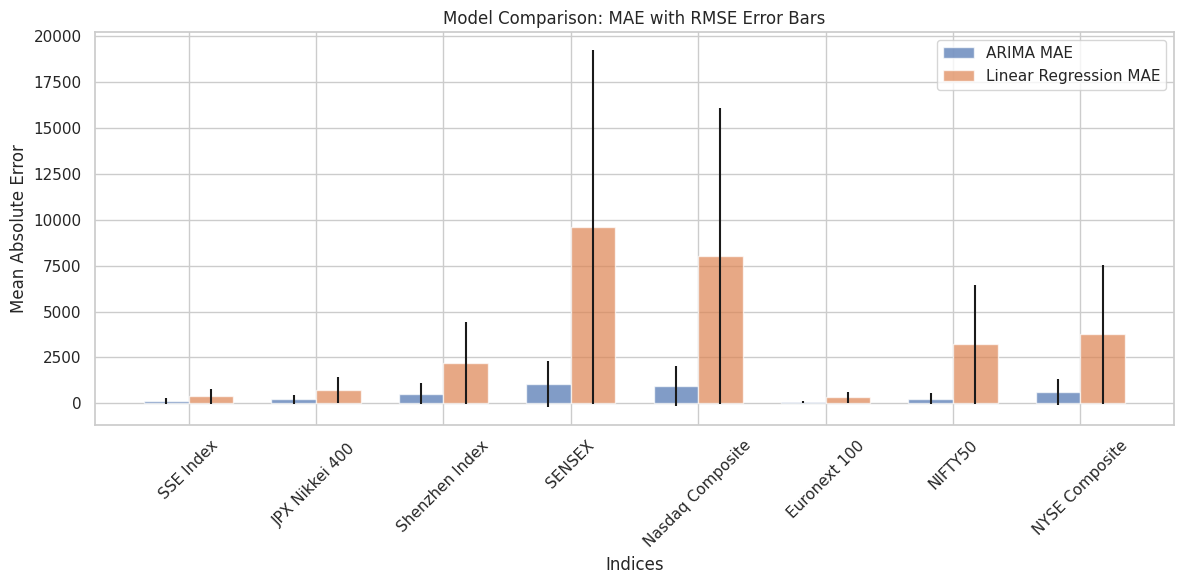

In [132]:
bar_width = 0.35

r1 = np.arange(len(results_df['Indices']))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, results_df['ARIMA_MAE'], width=bar_width, yerr=results_df['ARIMA_RMSE'], label='ARIMA MAE', alpha=0.7)
plt.bar(r2, results_df['LR_MAE'], width=bar_width, yerr=results_df['LR_RMSE'], label='Linear Regression MAE', alpha=0.7)

plt.title('Model Comparison: MAE with RMSE Error Bars')
plt.xlabel('Indices')
plt.ylabel('Mean Absolute Error')

plt.xticks([r + bar_width / 2 for r in range(len(results_df['Indices']))], results_df['Indices'], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

This plot compares the performance of two models, ARIMA and Linear Regression, using the Mean Absolute Error (MAE) metric for various financial indices. Additionally, Root Mean Squared Error (RMSE) is represented as error bars, providing insight into the variability and potential deviations of the predictions. Here's a detailed breakdown in the context of time series analysis:

***Plot Breakdown***

1. **Y-Axis (Mean Absolute Error - MAE)**:
   - MAE measures the average absolute difference between predicted and actual values. Lower MAE values indicate better model performance as it means the predictions are closer to the actual values.

2. **Error Bars (RMSE)**:
   - RMSE is depicted as error bars on top of each bar, indicating the spread of prediction errors. Larger error bars suggest more variability in predictions and potential outliers. RMSE penalizes larger errors more than MAE due to squaring errors before averaging, making it a useful indicator of error spread.

3. **X-Axis (Indices)**:
   - The indices analyzed include SSE Index, JPX Nikkei 400, Shenzhen Index, SENSEX, Nasdaq Composite, Euronext 100, NIFTY50, and NYSE Composite.

4. **Bars**:
   - **Blue Bars**: Represent the MAE for the ARIMA model.
   - **Orange Bars**: Represent the MAE for the Linear Regression model.

***Key Observations***

1. **ARIMA Model (Blue Bars)**:
   - ARIMA generally has lower MAE values across all indices compared to Linear Regression, indicating that ARIMA provides more accurate predictions for these time series data.
   - The error bars for ARIMA are relatively smaller, showing less variability and more consistent predictions compared to Linear Regression, especially for indices like the SSE Index, JPX Nikkei 400, and Euronext 100.

2. **Linear Regression Model (Orange Bars)**:
   - Linear Regression shows significantly higher MAE values, particularly for the SENSEX, Nasdaq Composite, and NYSE Composite. This suggests that Linear Regression is less suitable for forecasting these indices.
   - The large error bars indicate high variability in the prediction errors, which implies that Linear Regression might be generating more significant errors in some instances, making its predictions less reliable for time series forecasting in this context.

3. **Indices with High MAE and RMSE**:
   - SENSEX and Nasdaq Composite show the highest MAE and RMSE for Linear Regression, highlighting the challenges of using a simple Linear regression model for complex financial time series forecasting.
   - Even for ARIMA, while it performs better than Linear Regression, the RMSE values suggest that there is still some spread in the errors, but these are more controlled than in the Linear Regression case.

***Summary***

- **ARIMA** outperforms Linear Regression in forecasting the financial indices in this analysis. It provides more accurate predictions with lower error (MAE) and less variability (RMSE) across different indices.
- **Linear Regression** is not well-suited for time series forecasting of these financial indices due to its higher error rates and variability, indicating that it may not capture the time-dependent patterns and trends effectively.
  
In time series analysis, the choice of model is critical. ARIMA's superior performance here aligns with its design to handle time dependencies, trends, and seasonality, making it a preferred choice over Linear Regression for these financial time series forecasts.

# Conclusion

The **"World's Top 8 Stock Index Prediction through Time Series Analysis"** project effectively demonstrates the use of time series forecasting techniques to predict financial market trends. By leveraging models like ARIMA, the project provides valuable insights into stock market behavior, helping stakeholders make data-driven decisions.

- **Successes**: The project successfully identifies the strengths and weaknesses of different predictive models through comparative analysis using error metrics and visualizations. It showcases the applicability of time series models in financial forecasting.

- **Areas for Improvement**: Future iterations of the project could explore incorporating more advanced machine learning techniques or deep learning models such as LSTM (Long Short-Term Memory networks) for potentially better handling of non-linear trends and capturing long-term dependencies in stock price movements.

- **Business Impact**: The insights generated from this analysis can significantly aid investors in managing risks and optimizing investment portfolios by anticipating market downturns or capitalizing on upward trends.

Overall, this project highlights the importance of accurate time series analysis in the finance industry and provides a solid foundation for developing more sophisticated market prediction tools.